## Credit EDA Case Study

Identify patterns in the data which indicate if a client is likely to repay the loan or not.
Identify the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

##  Importing Libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 200) # to display all the rows
pd.options.display.float_format = '{:.4f}'.format # convert values like 4.225108e+11 to 422510842796.00

import os
import warnings
warnings.filterwarnings('ignore')
import random

##  Task 1: Import data and inspect dataframe

- ### Subtask 1.1: Read the application_data Data.

Read the application_data data file provided and store it in a dataframe `df`.

In [2]:
# Read input dataset. 
# Importing application_data csv to dataframe df
df = pd.read_csv("application_data.csv")

- ### Subtask 1.2: Inspect Dataframe.

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [3]:
# Checking first 5 rows to get idea about dataset
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [4]:
# Checking Shape of dataframe
df.shape

(307511, 122)

In [5]:
# Checking column information
df.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
# Checking numeric columns statistics
df.describe().T

count        mean         std         min  \
SK_ID_CURR                   307511.0000 278180.5186 102790.1753 100002.0000   
TARGET                       307511.0000      0.0807      0.2724      0.0000   
CNT_CHILDREN                 307511.0000      0.4171      0.7221      0.0000   
AMT_INCOME_TOTAL             307511.0000 168797.9193 237123.1463  25650.0000   
AMT_CREDIT                   307511.0000 599025.9997 402490.7770  45000.0000   
AMT_ANNUITY                  307499.0000  27108.5739  14493.7373   1615.5000   
AMT_GOODS_PRICE              307233.0000 538396.2074 369446.4605  40500.0000   
REGION_POPULATION_RELATIVE   307511.0000      0.0209      0.0138      0.0003   
DAYS_BIRTH                   307511.0000 -16036.9951   4363.9886 -25229.0000   
DAYS_EMPLOYED                307511.0000  63815.0459 141275.7665 -17912.0000   
DAYS_REGISTRATION            307511.0000  -4986.1203   3522.8863 -24672.0000   
DAYS_ID_PUBLISH              307511.0000  -2994.2024   1509.4504  -7197.0000   
OWN_CAR_AGE                  104582.0000     12.0611     11.9448      0.0000   
FLAG_MOBIL                   307511.0000      1.0000      0.0018      0.0000   
FLAG_EMP_PHONE               307511.0000      0.8199      0.3843      0.0000   
FLAG_WORK_PHONE              307511.0000      0.1994      0.3995      0.0000   
FLAG_CONT_MOBILE             307511.0000      0.9981      0.0432      0.0000   
FLAG_PHONE                   307511.0000      0.2811      0.4495      0.0000   
FLAG_EMAIL                   307511.0000      0.0567      0.2313      0.0000   
CNT_FAM_MEMBERS              307509.0000      2.1527      0.9107      1.0000   
REGION_RATING_CLIENT         307511.0000      2.0525      0.5090      1.0000   
REGION_RATING_CLIENT_W_CITY  307511.0000      2.0315      0.5027      1.0000   
HOUR_APPR_PROCESS_START      307511.0000     12.0634      3.2658      0.0000   
REG_REGION_NOT_LIVE_REGION   307511.0000      0.0151      0.1221      0.0000   
REG_REGION_NOT_WORK_REGION   307511.0000      0.0508      0.2195      0.0000   
LIVE_REGION_NOT_WORK_REGION  307511.0000      0.0407      0.1975      0.0000   
REG_CITY_NOT_LIVE_CITY       307511.0000      0.0782      0.2684      0.0000   
REG_CITY_NOT_WORK_CITY       307511.0000      0.2305      0.4211      0.0000   
LIVE_CITY_NOT_WORK_CITY      307511.0000      0.1796      0.3838      0.0000   
EXT_SOURCE_1                 134133.0000      0.5021      0.2111      0.0146   
EXT_SOURCE_2                 306851.0000      0.5144      0.1911      0.0000   
EXT_SOURCE_3                 246546.0000      0.5109      0.1948      0.0005   
APARTMENTS_AVG               151450.0000      0.1174      0.1082      0.0000   
BASEMENTAREA_AVG             127568.0000      0.0884      0.0824      0.0000   
YEARS_BEGINEXPLUATATION_AVG  157504.0000      0.9777      0.0592      0.0000   
YEARS_BUILD_AVG              103023.0000      0.7525      0.1133      0.0000   
COMMONAREA_AVG                92646.0000      0.0446      0.0760      0.0000   
ELEVATORS_AVG                143620.0000      0.0789      0.1346      0.0000   
ENTRANCES_AVG                152683.0000      0.1497      0.1000      0.0000   
FLOORSMAX_AVG                154491.0000      0.2263      0.1446      0.0000   
FLOORSMIN_AVG                 98869.0000      0.2319      0.1614      0.0000   
LANDAREA_AVG                 124921.0000      0.0663      0.0812      0.0000   
LIVINGAPARTMENTS_AVG          97312.0000      0.1008      0.0926      0.0000   
LIVINGAREA_AVG               153161.0000      0.1074      0.1106      0.0000   
NONLIVINGAPARTMENTS_AVG       93997.0000      0.0088      0.0477      0.0000   
NONLIVINGAREA_AVG            137829.0000      0.0284      0.0695      0.0000   
APARTMENTS_MODE              151450.0000      0.1142      0.1079      0.0000   
BASEMENTAREA_MODE            127568.0000      0.0875      0.0843      0.0000   
YEARS_BEGINEXPLUATATION_MODE 157504.0000      0.9771      0.0646      0.0000   
YEARS_BUILD_MODE             103023

In [7]:
# Columns with NaN values
df.columns[df.isna().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [8]:
# Check if any duplicate rows are present
sum(df.duplicated())

0

In [9]:
# Check how many columns can be categorical (Categorigal column tend to have lesser unique values)
df.nunique(axis = 0).sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

##  Task 2: Data Quality Check

- ### Subtask 2.1: Missing values analysis

Check percentage of missing values in each columns
If percentage is more than 50% then we can drop the columns as they are not required for analysis

In [10]:
#Get percentage of missing values for each column
df_missing = df.isnull().sum().sort_values()
df_missing = round(df_missing/len(df)*100,2)
df_missing.loc[df_missing > 0]


AMT_GOODS_PRICE                 0.0900
EXT_SOURCE_2                    0.2100
DEF_30_CNT_SOCIAL_CIRCLE        0.3300
DEF_60_CNT_SOCIAL_CIRCLE        0.3300
OBS_60_CNT_SOCIAL_CIRCLE        0.3300
OBS_30_CNT_SOCIAL_CIRCLE        0.3300
NAME_TYPE_SUITE                 0.4200
AMT_REQ_CREDIT_BUREAU_HOUR     13.5000
AMT_REQ_CREDIT_BUREAU_DAY      13.5000
AMT_REQ_CREDIT_BUREAU_MON      13.5000
AMT_REQ_CREDIT_BUREAU_WEEK     13.5000
AMT_REQ_CREDIT_BUREAU_YEAR     13.5000
AMT_REQ_CREDIT_BUREAU_QRT      13.5000
EXT_SOURCE_3                   19.8300
OCCUPATION_TYPE                31.3500
EMERGENCYSTATE_MODE            47.4000
TOTALAREA_MODE                 48.2700
YEARS_BEGINEXPLUATATION_MODE   48.7800
YEARS_BEGINEXPLUATATION_AVG    48.7800
YEARS_BEGINEXPLUATATION_MEDI   48.7800
FLOORSMAX_AVG                  49.7600
FLOORSMAX_MEDI                 49.7600
FLOORSMAX_MODE                 49.7600
HOUSETYPE_MODE                 50.1800
LIVINGAREA_AVG                 50.1900
LIVINGAREA_MODE          

In [11]:
#Get list of columns having missing values greater than 13 % 
df_missing = df.isnull().sum().sort_values()
df_missing = round(df_missing/len(df)*100,2)
df_missing.loc[df_missing > 13]

AMT_REQ_CREDIT_BUREAU_HOUR     13.5000
AMT_REQ_CREDIT_BUREAU_DAY      13.5000
AMT_REQ_CREDIT_BUREAU_MON      13.5000
AMT_REQ_CREDIT_BUREAU_WEEK     13.5000
AMT_REQ_CREDIT_BUREAU_YEAR     13.5000
AMT_REQ_CREDIT_BUREAU_QRT      13.5000
EXT_SOURCE_3                   19.8300
OCCUPATION_TYPE                31.3500
EMERGENCYSTATE_MODE            47.4000
TOTALAREA_MODE                 48.2700
YEARS_BEGINEXPLUATATION_MODE   48.7800
YEARS_BEGINEXPLUATATION_AVG    48.7800
YEARS_BEGINEXPLUATATION_MEDI   48.7800
FLOORSMAX_AVG                  49.7600
FLOORSMAX_MEDI                 49.7600
FLOORSMAX_MODE                 49.7600
HOUSETYPE_MODE                 50.1800
LIVINGAREA_AVG                 50.1900
LIVINGAREA_MODE                50.1900
LIVINGAREA_MEDI                50.1900
ENTRANCES_AVG                  50.3500
ENTRANCES_MODE                 50.3500
ENTRANCES_MEDI                 50.3500
APARTMENTS_MEDI                50.7500
APARTMENTS_AVG                 50.7500
APARTMENTS_MODE          

In [12]:
#Get list of columns having missing values less than 13 %
df_missing = df.isnull().sum().sort_values()
df_missing = round(df_missing/len(df)*100,2)
df_missing.loc[(df_missing < 13) & (df_missing > 0)]


AMT_GOODS_PRICE            0.0900
EXT_SOURCE_2               0.2100
DEF_30_CNT_SOCIAL_CIRCLE   0.3300
DEF_60_CNT_SOCIAL_CIRCLE   0.3300
OBS_60_CNT_SOCIAL_CIRCLE   0.3300
OBS_30_CNT_SOCIAL_CIRCLE   0.3300
NAME_TYPE_SUITE            0.4200
dtype: float64

In [13]:

# user defined generic function to drop columns having percentage of missing value given as input
# Default percentage of missing value is 50%

def dropNullCols(df, percent=0.5):
    df_1 = df.copy()
    df_missing = (df.isnull().sum()/len(df))
    missing_col = list(df_missing[df_missing.values>percent].index)
    df.drop(labels = missing_col,axis =1,inplace=True)        
    print("Total Number of Columns dropped\t: ",len(missing_col)) 
    print("\nShape of dataset before dropping columns\t: ",df_1.shape)
    print("\nShape of dataset after dropping columns\t: ",df.shape)

    return df

- ### Conclusion:

1. Columns with high percentage of missing values (>50%) can be dropped.
2. Columns with missing value percentage between 13% and 50% can be left untouched as we are not going to do create models as well.

AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
EXT_SOURCE_3                    19.83
OCCUPATION_TYPE                 31.35
EMERGENCYSTATE_MODE             47.40
TOTALAREA_MODE                  48.27
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_AVG                   49.76

3. Columns with very less percentage of missing values (<13%) can be imputed with median, mean or mode based on following criteria,
If numerical columns and if there are outliers,use median, otherwise go with mean.
If categorical columns, then go with mode.

AMT_GOODS_PRICE             0.09
EXT_SOURCE_2                0.21
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
NAME_TYPE_SUITE             0.42

In [14]:
# Dropping  columns with high percentage of missing values (>50%) 
df = dropNullCols(df)

Total Number of Columns dropped	:  41

Shape of dataset before dropping columns	:  (307511, 122)

Shape of dataset after dropping columns	:  (307511, 81)


## Handling JUNK DATA ('XNA') cases 

**Columns having value as XNA (Not Available or Not Applicable ) can be consider for imputation**

In [15]:
# Distinct values in Gender column

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As we can see, there are 4 rows with value as 'XNA'. We can either replace it with NaN or replace with available option (F or M ). In this case study, we will replace it with Female as female constitute more records compare to Male. It should not impact our analysis as there are 4 such rows.

In [16]:
# Updating with "F" for these 4 rows

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [17]:
# Distinct values in ORGANIZATION_TYPE column
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

As we can see, there are 55374 rows with value as 'XNA' out of 307509 rows. We can either replace it with NaN or replace with another value ('Other'). In this case study, we will replace it with NaN for better analysis.

In [18]:
# Updating with "NaN" for these 4 rows

df.loc[df['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']=np.nan

df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [19]:
# Dropping unwanted columns
# These columns are not needed for analysis

cols=['DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=cols,axis=1,inplace=True)

- ### Subtask 2.2: Standardizing Column values

In [20]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [21]:
# Changing negative column values to positive for below columns,
# DAYS_BIRTH , DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH  

df["DAYS_BIRTH"] = df.DAYS_BIRTH.abs()

df["DAYS_EMPLOYED"] = df.DAYS_EMPLOYED.abs()

df["DAYS_REGISTRATION"] = df.DAYS_REGISTRATION.abs()

df["DAYS_ID_PUBLISH"] = df.DAYS_ID_PUBLISH.abs()

In [22]:
# Convert age variable into years for better understanding

df['DAYS_BIRTH'] = df['DAYS_BIRTH']//365

In [23]:
df['DAYS_BIRTH'].describe()

count   307511.0000
mean        43.4360
std         11.9546
min         20.0000
25%         34.0000
50%         43.0000
75%         53.0000
max         69.0000
Name: DAYS_BIRTH, dtype: float64

**We can deduce from the above output that maximum age is around 69 years and minimum is 20 years in current dataset.**

- ### Subtask 2.3: Outliers detection

In [24]:
#summary stats table transposed for df

numeric_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH','AMT_CREDIT','REGION_POPULATION_RELATIVE']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)

df.describe().T

count        mean         std         min  \
SK_ID_CURR                   307511.0000 278180.5186 102790.1753 100002.0000   
TARGET                       307511.0000      0.0807      0.2724      0.0000   
CNT_CHILDREN                 307511.0000      0.4171      0.7221      0.0000   
AMT_INCOME_TOTAL             307511.0000 168797.9193 237123.1463  25650.0000   
AMT_CREDIT                   307511.0000 599025.9997 402490.7770  45000.0000   
AMT_ANNUITY                  307499.0000  27108.5739  14493.7373   1615.5000   
AMT_GOODS_PRICE              307233.0000 538396.2074 369446.4605  40500.0000   
REGION_POPULATION_RELATIVE   307511.0000      0.0209      0.0138      0.0003   
DAYS_BIRTH                   307511.0000     43.4360     11.9546     20.0000   
DAYS_EMPLOYED                307511.0000  67724.7421 139443.7518      0.0000   
DAYS_REGISTRATION            307511.0000   4986.1203   3522.8863      0.0000   
DAYS_ID_PUBLISH              307511.0000   2994.2024   1509.4504      0.0000   
FLAG_MOBIL                   307511.0000      1.0000      0.0018      0.0000   
FLAG_EMP_PHONE               307511.0000      0.8199      0.3843      0.0000   
FLAG_WORK_PHONE              307511.0000      0.1994      0.3995      0.0000   
FLAG_CONT_MOBILE             307511.0000      0.9981      0.0432      0.0000   
FLAG_PHONE                   307511.0000      0.2811      0.4495      0.0000   
FLAG_EMAIL                   307511.0000      0.0567      0.2313      0.0000   
CNT_FAM_MEMBERS              307509.0000      2.1527      0.9107      1.0000   
REGION_RATING_CLIENT         307511.0000      2.0525      0.5090      1.0000   
REGION_RATING_CLIENT_W_CITY  307511.0000      2.0315      0.5027      1.0000   
HOUR_APPR_PROCESS_START      307511.0000     12.0634      3.2658      0.0000   
REG_REGION_NOT_LIVE_REGION   307511.0000      0.0151      0.1221      0.0000   
REG_REGION_NOT_WORK_REGION   307511.0000      0.0508      0.2195      0.0000   
LIVE_REGION_NOT_WORK_REGION  307511.0000      0.0407      0.1975      0.0000   
REG_CITY_NOT_LIVE_CITY       307511.0000      0.0782      0.2684      0.0000   
REG_CITY_NOT_WORK_CITY       307511.0000      0.2305      0.4211      0.0000   
LIVE_CITY_NOT_WORK_CITY      307511.0000      0.1796      0.3838      0.0000   
EXT_SOURCE_2                 306851.0000      0.5144      0.1911      0.0000   
EXT_SOURCE_3                 246546.0000      0.5109      0.1948      0.0005   
YEARS_BEGINEXPLUATATION_AVG  157504.0000      0.9777      0.0592      0.0000   
FLOORSMAX_AVG                154491.0000      0.2263      0.1446      0.0000   
YEARS_BEGINEXPLUATATION_MODE 157504.0000      0.9771      0.0646      0.0000   
FLOORSMAX_MODE               154491.0000      0.2223      0.1437      0.0000   
YEARS_BEGINEXPLUATATION_MEDI 157504.0000      0.9778      0.0599      0.0000   
FLOORSMAX_MEDI               154491.0000      0.2259      0.1451      0.0000   
TOTALAREA_MODE               159080.0000      0.1025      0.1075      0.0000   
OBS_30_CNT_SOCIAL_CIRCLE     306490.0000      1.4222      2.4010      0.0000   
DEF_30_CNT_SOCIAL_CIRCLE     306490.0000      0.1434      0.4467      0.0000   
OBS_60_CNT_SOCIAL_CIRCLE     306490.0000      1.4053      2.3798      0.0000   
DEF_60_CNT_SOCIAL_CIRCLE     306490.0000      0.1000      0.3623      0.0000   
AMT_REQ_CREDIT_BUREAU_HOUR   265992.0000      0.0064      0.0838      0.0000   
AMT_REQ_CREDIT_BUREAU_DAY    265992.0000      0.0070      0.1108      0.0000   
AMT_REQ_CREDIT_BUREAU_WEEK   265992.0000      0.0344      0.2047      0.0000   
AMT_REQ_CREDIT_BUREAU_MON    265992.0000      0.2674      0.9160      0.0000   
AMT_REQ_CREDIT_BUREAU_QRT    265992.0000      0.2655      0.7941      0.0000   
AMT_REQ_CREDIT_BUREAU_YEAR   265992.0000      1.9000      1.8693      0.0000   

                                     25%         50%         75%  \
SK_ID_CURR                   189145.5000 278202.0000 367142.5000   
TARGET                            0.0000      0.0000      

In [25]:
# user defined generic function to plot basic box plot
def plotBoxPlot(df, col):
    sns.boxplot(df[col])
    plt.show()

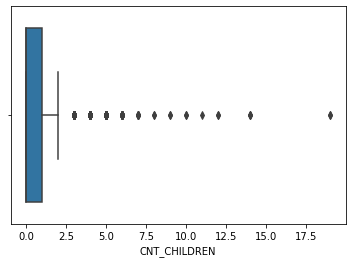

count   307511.0000
mean         0.4171
std          0.7221
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

In [26]:
# Outlier detection in CNT_CHILDREN column    
plotBoxPlot(df,'CNT_CHILDREN') 

df['CNT_CHILDREN'].describe()   

As we can see, there is one value close to 19 in above plot. Hence, this is an outlier. It can be confirmed from describe output as well. Difference between 3rd Quartile and max value is huge.

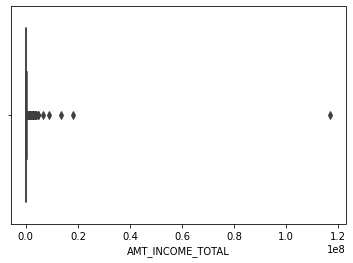

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [27]:
# Outlier detection in AMT_INCOME_TOTAL column    
plotBoxPlot(df,'AMT_INCOME_TOTAL') 

df['AMT_INCOME_TOTAL'].describe()   

As we can see, max amount is way above the mean and 75th percentile. Hence, it is an outlier.

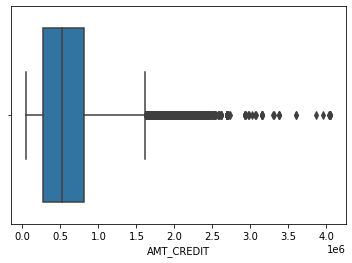

count    307511.0000
mean     599025.9997
std      402490.7770
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

In [28]:
# Outlier detection in AMT_INCOME_TOTAL column    
plotBoxPlot(df,'AMT_CREDIT') 

df['AMT_CREDIT'].describe() 

Again, here as well outliers are present

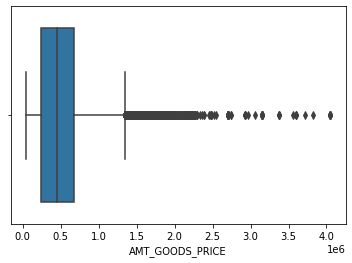

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [29]:
# Outlier detection in AMT_GOODS_PRICE column    
plotBoxPlot(df,'AMT_GOODS_PRICE') 

df['AMT_GOODS_PRICE'].describe() 

- ### Subtask 2.4: Binning of Continous variables

In [30]:
df.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [31]:
# Creating bins for AMT_GOODS_PRICE

bins = [0,500000,1000000,2000000,3000000,4000000]
slot = ['Low','Below Average','Average','Above Average','High']

df['AMT_GOODS_PRICE_CAT']=pd.cut(df['AMT_GOODS_PRICE'],bins,labels=slot)
df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188          25            637          3648.0000   
1                      0.0035          45           1188          1186.0000   
2                      0.0100          52            225          4260.0000   
3                      0.0080          52           3039          9833.0000   
4                      0.0287          54           3038          4311.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0       

In [32]:
# Checking values for AMT_CREDIT
df.AMT_CREDIT.describe()

count    307511.0000
mean     599025.9997
std      402490.7770
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

In [33]:
# Creating bins for AMT_CREDIT column

bins = [0, 50000, 100000, 150000, 200000, 250000,400000]
slot = ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000-250000','250000 and above']

df['AMT_CREDIT_CAT']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slot)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188          25            637          3648.0000   
1                      0.0035          45           1188          1186.0000   
2                      0.0100          52            225          4260.0000   
3                      0.0080          52           3039          9833.0000   
4                      0.0287          54           3038          4311.0000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0       

##  Task 3: Imbalance or Balance dataset?

- ### Subtask 3.1: Checking whether dataset is balanced or not based on 'Target' variable

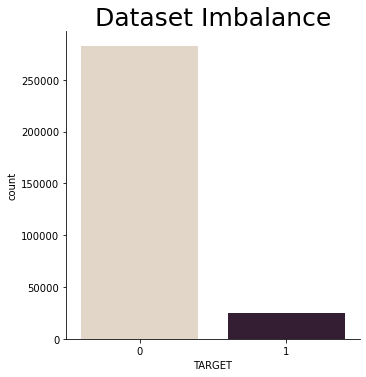

In [34]:
# Count plot for 'Target' column to check whether dataset is balanced or not
sns.catplot(x="TARGET", kind="count", palette="ch:.25", data=df)
plt.title('Dataset Imbalance',fontsize=25)
plt.show()

In [35]:
df.TARGET.value_counts(normalize=True)*100

0   91.9271
1    8.0729
Name: TARGET, dtype: float64

### CONCLUSION

**As shown in the above plot and describe output, we can clearly see the imbalance between target type 1 and 0. We can conclude that dataset is highly imbalance. Close to 92% data belongs to non defaulters whereas 8% data is for defaulters**

- ### Subtask 3.2: Dividing the dataset
- Defaulters: Target=1
- Non Defaulters: Target=0

In [36]:
# Creating two separate dataset based on TARGET column

df_1 = df[df['TARGET'] == 1]
df_1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
26       100031       1         Cash loans           F            N   
40       100047       1         Cash loans           M            N   
42       100049       1         Cash loans           F            N   
81       100096       1         Cash loans           F            N   
94       100112       1         Cash loans           M            Y   
110      100130       1         Cash loans           F            N   
138      100160       1         Cash loans           M            N   
154      100181       1         Cash loans           F            N   
163      100192       1         Cash loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0       202500.0000  406597.5000   24700.5000   
26                Y             0       112500.0000  979992.0000   27076.5000   
40                Y             0       202500.0000 1193580.0000   35028.0000   
42                N             0       135000.0000  288873.0000   16258.5000   
81                Y             0        81000.0000  252000.0000   14593.5000   
94                Y             0       315000.0000  953460.0000   64107.0000   
110               Y             1       157500.0000  723996.0000   30802.5000   
138               Y             0       292500.0000  675000.0000   36747.0000   
154               Y             0       157500.0000  245619.0000   12667.5000   
163               N             0       111915.0000  225000.0000   21037.5000   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        351000.0000   Unaccompanied               Working   
26       702000.0000   Unaccompanied               Working   
40       855000.0000   Unaccompanied  Commercial associate   
42       238500.0000   Unaccompanied               Working   
81       252000.0000   Unaccompanied             Pensioner   
94       900000.0000          Family  Commercial associate   
110      585000.0000   Unaccompanied  Commercial associate   
138      675000.0000   Unaccompanied               Working   
154      166500.0000   Unaccompanied               Working   
163      225000.0000   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary / secondary special  Single / not married  House / apartment   
26   Secondary / secondary special                 Widow  House / apartment   
40   Secondary / secondary special               Married  House / apartment   
42   Secondary / secondary special        Civil marriage  House / apartment   
81   Secondary / secondary special               Married  House / apartment   
94               Incomplete higher  Single / not married       With parents   
110              Incomplete higher             Separated  House / apartment   
138               Higher education               Married  House / apartment   
154  Secondary / secondary special  Single / not married  House / apartment   
163  Secondary / secondary special  Single / not married       With parents   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.0188          25            637          3648.0000   
26                       0.0180          51           2628          6573.0000   
40                       0.0252          47           1262          1182.0000   
42                       0.0073          36           3597            45.0000   
81                       0.0287          67         365243          5391.0000   
94                       0.0308          27           2015          4802.0000   
110                      0.0073          28            267           387.0000   
138                      0.0358          45            200          5239.0000   
154                      0.0226          48      

In [37]:
df_0 = df[df['TARGET'] == 0]
df_0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
1                N             0       270000.0000 1293502.5000   35698.5000   
2                Y             0        67500.0000  135000.0000    6750.0000   
3                Y             0       135000.0000  312682.5000   29686.5000   
4                Y             0       121500.0000  513000.0000   21865.5000   
5                Y             0        99000.0000  490495.5000   27517.5000   
6                Y             1       171000.0000 1560726.0000   41301.0000   
7                Y             0       360000.0000 1530000.0000   42075.0000   
8                Y             0       112500.0000 1019610.0000   33826.5000   
9                Y             0       135000.0000  405000.0000   20250.0000   
10               Y             1       112500.0000  652500.0000   21177.0000   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1      1129500.0000           Family         State servant   
2       135000.0000    Unaccompanied               Working   
3       297000.0000    Unaccompanied               Working   
4       513000.0000    Unaccompanied               Working   
5       454500.0000  Spouse, partner         State servant   
6      1395000.0000    Unaccompanied  Commercial associate   
7      1530000.0000    Unaccompanied         State servant   
8       913500.0000         Children             Pensioner   
9       405000.0000    Unaccompanied               Working   
10      652500.0000    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
8   Secondary / secondary special               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                       0.0035          45           1188          1186.0000   
2                       0.0100          52            225          4260.0000   
3                       0.0080          52           3039          9833.0000   
4                       0.0287          54           3038          4311.0000   
5                       0.0358          46           1588          4970.0000   
6                       0.0358          37           3130          1213.0000   
7                       0.0031          51            449          4597.0000   
8                       0.0186          55         365243          7427.0000   
9                       0.0197          39           2019         14437.0000   
10        

##  Task 4: Univariate and Bivariate Analysis

- ### Subtask 4.1: Univariate Analysis - Categorical Variables

In [38]:
# Function to return count plot for categorical and Continous variable based on chart type argument

def plot_univ(df, df_1,df_0, col, chartType=1):
    
    if chartType == 1:
        plt.figure(figsize = (20,10))
        plt.subplot(1,2,1)
        plt.title("Defaulters (Target 1)")

        if col=='ORGANIZATION_TYPE':
            sns.countplot(data=df_1,y='ORGANIZATION_TYPE',order=df_1['ORGANIZATION_TYPE'].value_counts().index,palette='rocket')
            plt.xscale('log')
        else:
            sns.countplot(x=col, data = df_1,order=df_1[col].value_counts().index,hue = 'CODE_GENDER',palette='rocket')

        plt.xticks(rotation = 90)

        plt.subplot(1,2,2)
        plt.title("Non Defaulters (Target 0)")

        if col=='ORGANIZATION_TYPE':
            sns.countplot(data=df_0,y='ORGANIZATION_TYPE',order=df_0['ORGANIZATION_TYPE'].value_counts().index,palette='rocket')
            plt.xscale('log')
        else:
            sns.countplot(x = col, data = df_0,order=df_0[col].value_counts().index,hue = 'CODE_GENDER',palette='rocket')
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()

        if col!='ORGANIZATION_TYPE':    
            plt.subplot(2,1,1)
            plt.title("Defaulters (Target 1) w.r.t to Target")
            sns.barplot(x = col, y = 'TARGET',hue = 'CODE_GENDER',  data = df)
            plt.xticks(rotation = 90) 
            plt.show() 
        
    if chartType == 0:
        fig, ax=plt.subplots(nrows =2,ncols=2,figsize=(20,10))
        ax[0,0].set_title(" Distribution Plot (Target 1)")
        sns.distplot(df_1[col],ax=ax[0,0])
        ax[0,1].set_title("Box Plot (Target 1)")
        sns.boxplot(data =df_1, x=col,ax=ax[0,1])
        ax[1,0].set_title("Distribution Plot (Target 0)")
        sns.distplot(df_0[col],ax=ax[1,0])
        ax[1,1].set_title("Box Plot (Target 0)")
        sns.boxplot(data =df_0, x=col,ax=ax[1,1])        
        plt.xticks(rotation = 90)  
        plt.tight_layout()
        plt.show()
    

# 1. NAME_EDUCATION_TYPE

In [39]:
plot_univ(df, df_1,df_0,'NAME_EDUCATION_TYPE')

### OBSERVATION
**People with Secondary education level are amongst the top creditor. Also, from the 3rd plot, we can infer that people with lower secondary as educatio level are most likely to default.**



# 2. NAME_INCOME_TYPE


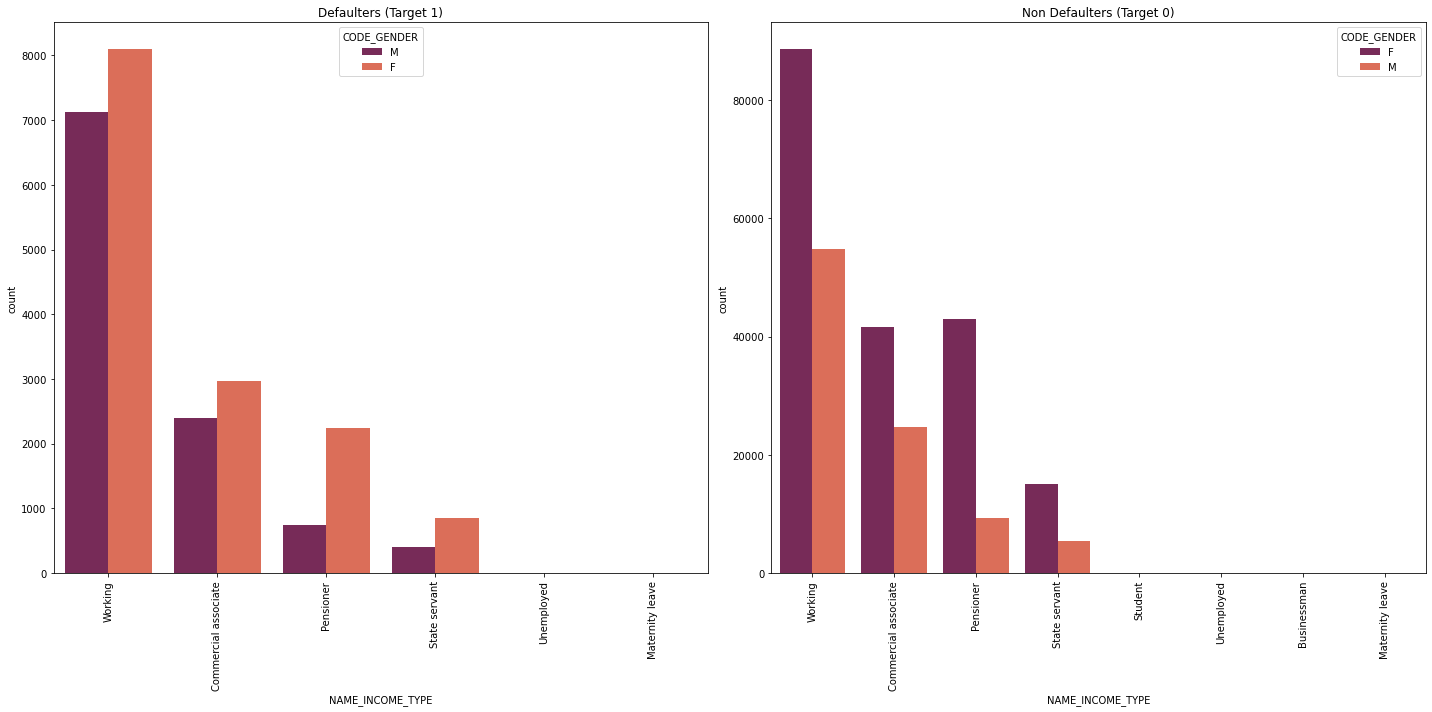

In [40]:
plot_univ(df, df_1,df_0,'NAME_INCOME_TYPE')

### OBSERVATION
**Clients with 'Working' income types are more in number in both datasets, i.e. credits are higher for them.
Number of working Females are more in both datasets.
Income type as Maternity Leave could lead to increase in chances of default.**

# 3. NAME_CONTRACT_TYPE

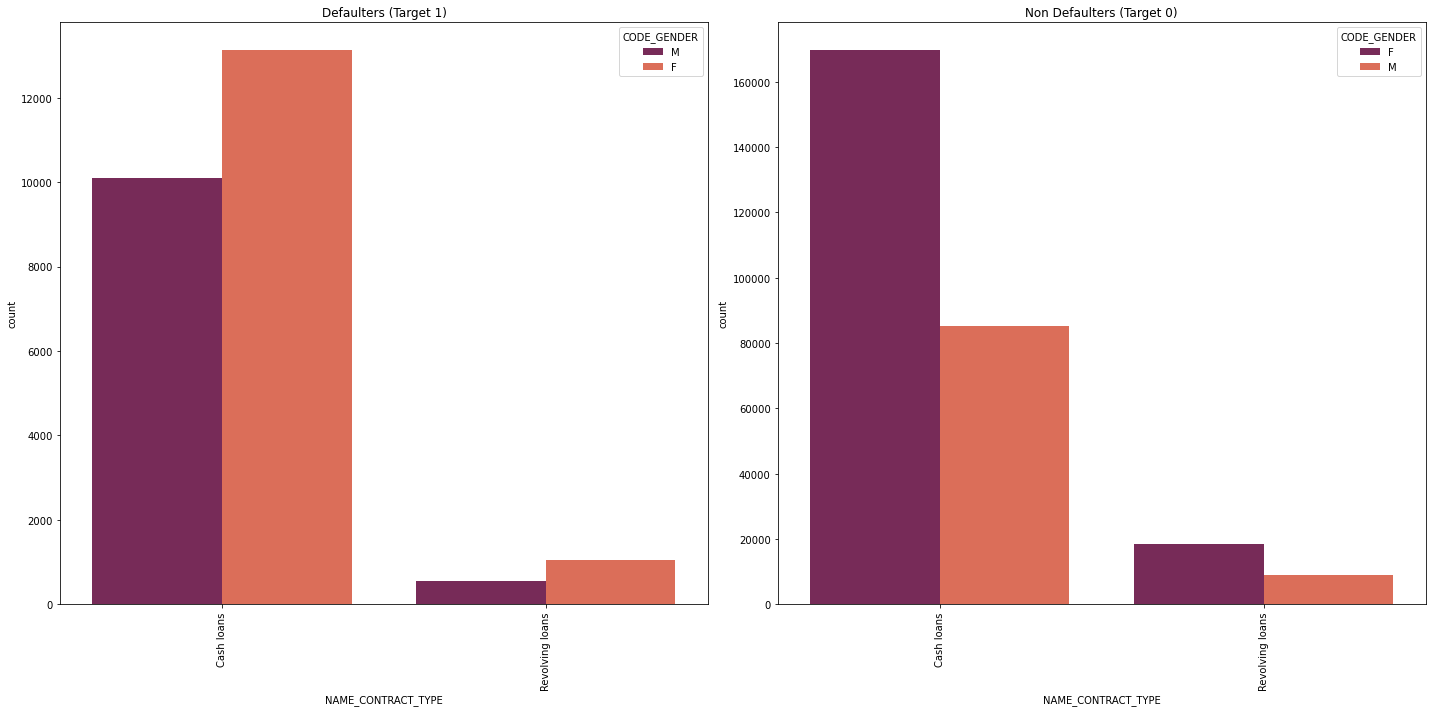

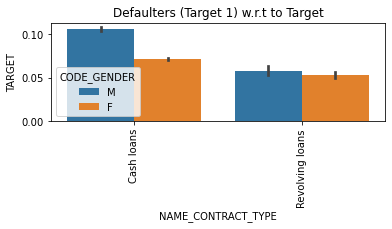

In [41]:
plot_univ(df, df_1,df_0,'NAME_CONTRACT_TYPE')

### OBSERVATION
**Cash loans are amongst top contracts. 
Number of females are higher in number in both datasets, i.e. Females take more credits as compared to Men
Number of Revolving loans are much higher in target 0 as compared to target 1**

# 4. ORGANIZATION_TYPE

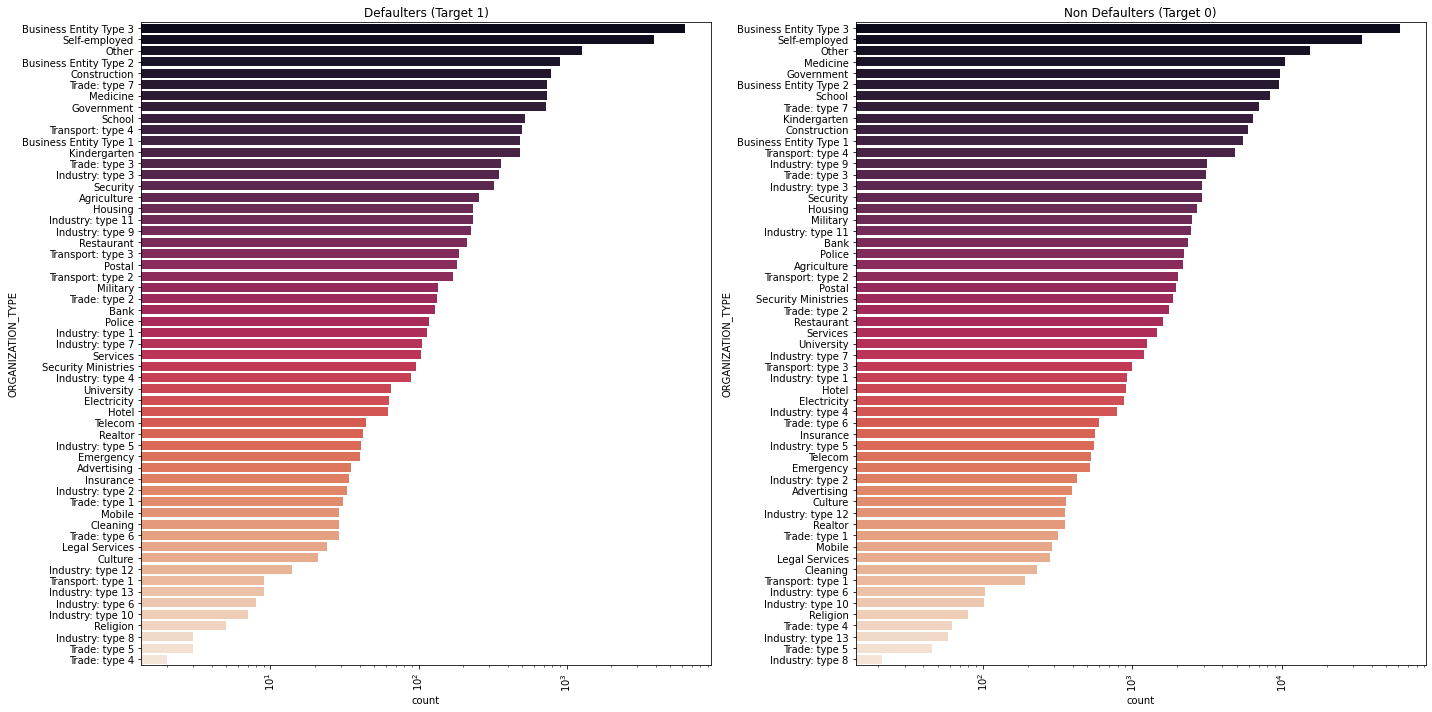

In [42]:
plot_univ(df, df_1,df_0,'ORGANIZATION_TYPE')

### OBSERVATION
**Most of the clients belongs to organization type Business entity Type 3,Self employed,Other and 
very few clients are from Industry type 12,type 13, type 10, religion and trade types in both dataframes**

 # 5. NAME_HOUSING_TYPE

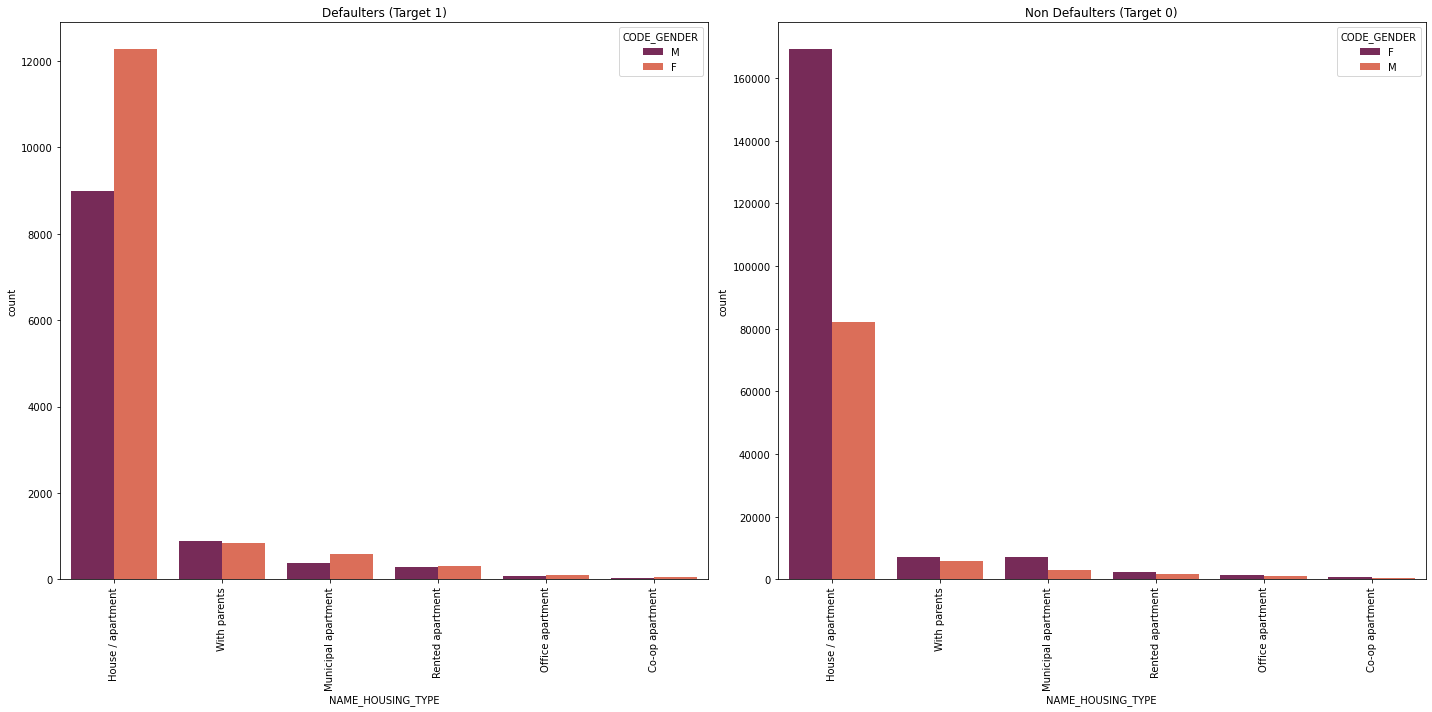

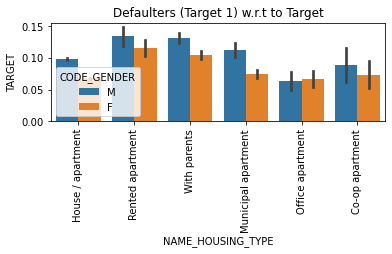

In [43]:
plot_univ(df, df_1,df_0,'NAME_HOUSING_TYPE')

### OBSERVATION
**People owing House/apartment are taking more loans. Based on 3rd plot, we can infer that people living in rented apartment are having issue in loan repayment. They are more likely to default. People living with parents are less likely to default.**

 # 5. AMT_CREDIT_CAT

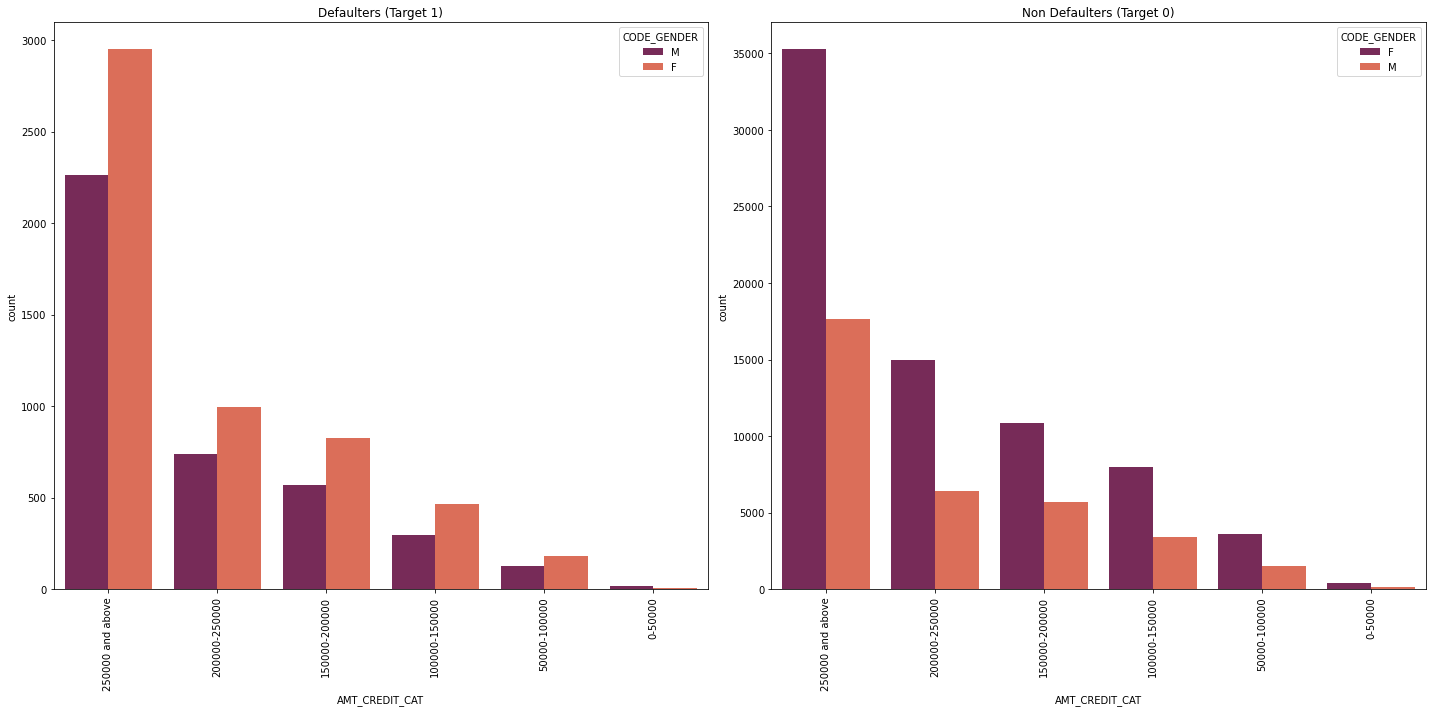

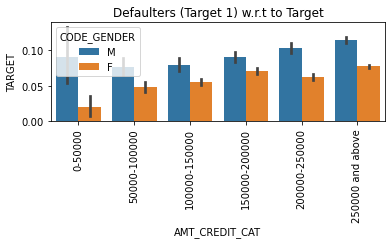

In [44]:
plot_univ(df, df_1,df_0,'AMT_CREDIT_CAT')

### OBSERVATION
**People owing House/apartment are taking more loans. People taking huge loans (> 250000) are more likey to default.**

 # 6. NAME_FAMILY_STATUS

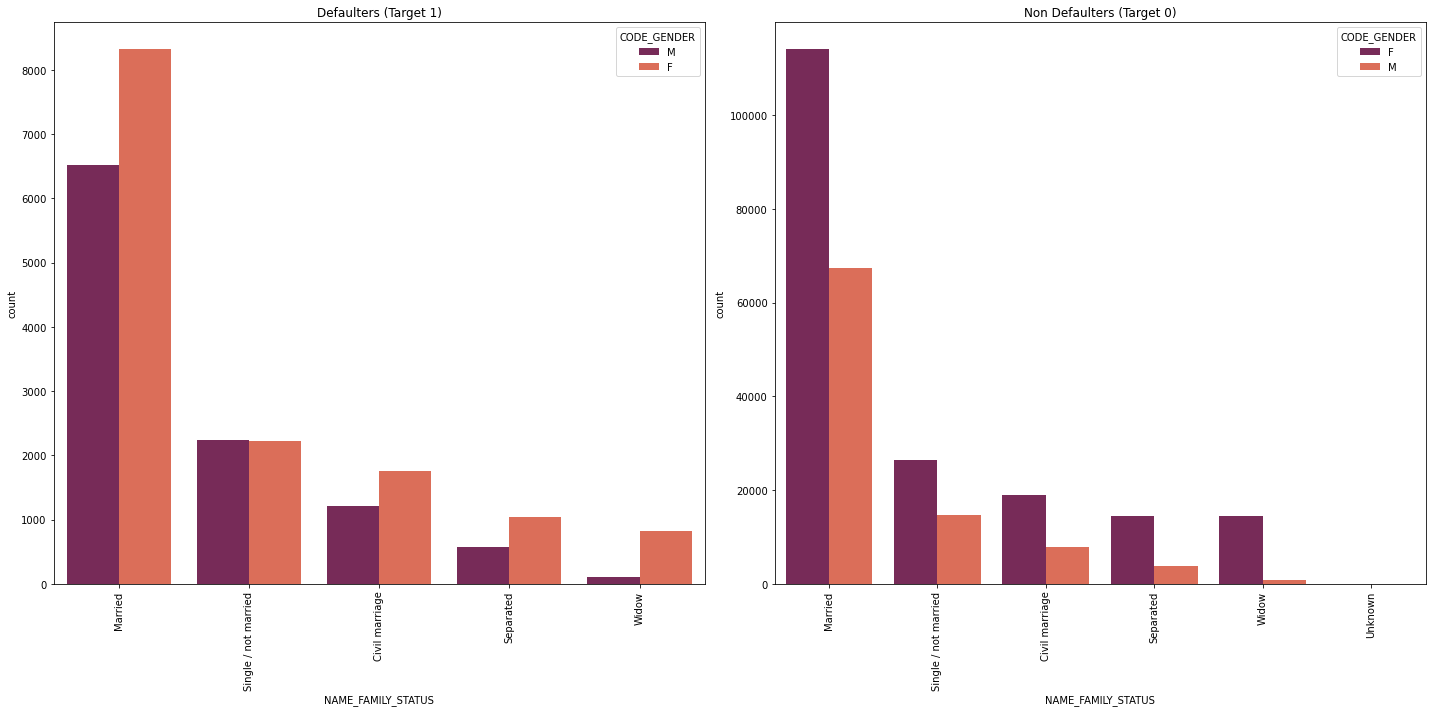

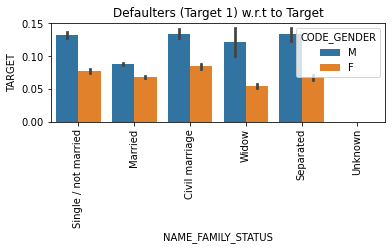

In [45]:
plot_univ(df, df_1,df_0,'NAME_FAMILY_STATUS')

### OBSERVATION
**Married people take most of the loan. Civil marriage constitue highest percentage of non repayment.**

- ### Subtask 4.2: Univariate Analysis - Continous Variables

 # 7. AMT_CREDIT

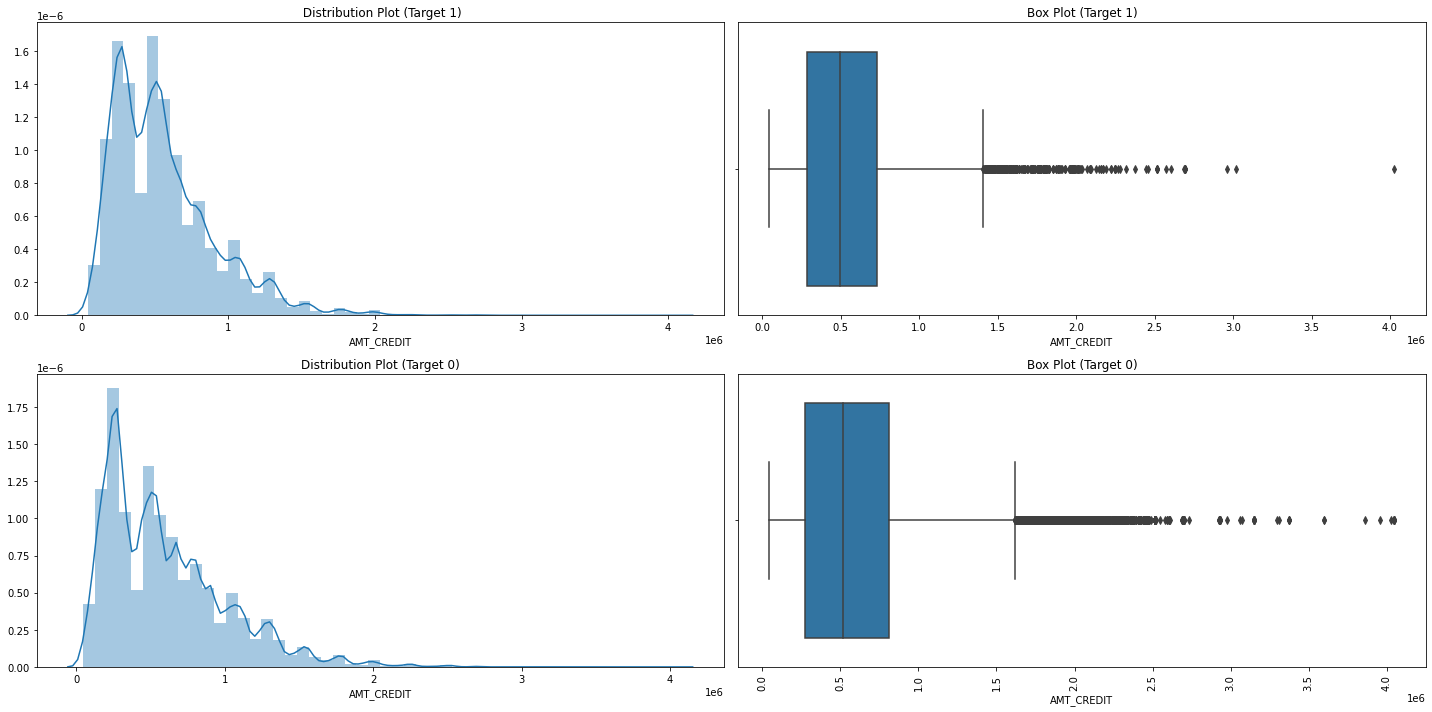

In [46]:
plot_univ(df, df_1,df_0,'AMT_CREDIT',chartType=0)

### OBSERVATION

**Outliers are observed based on box plot. Major distribution lies between 0 - 1** 

# 8. AMT_ANNUITY

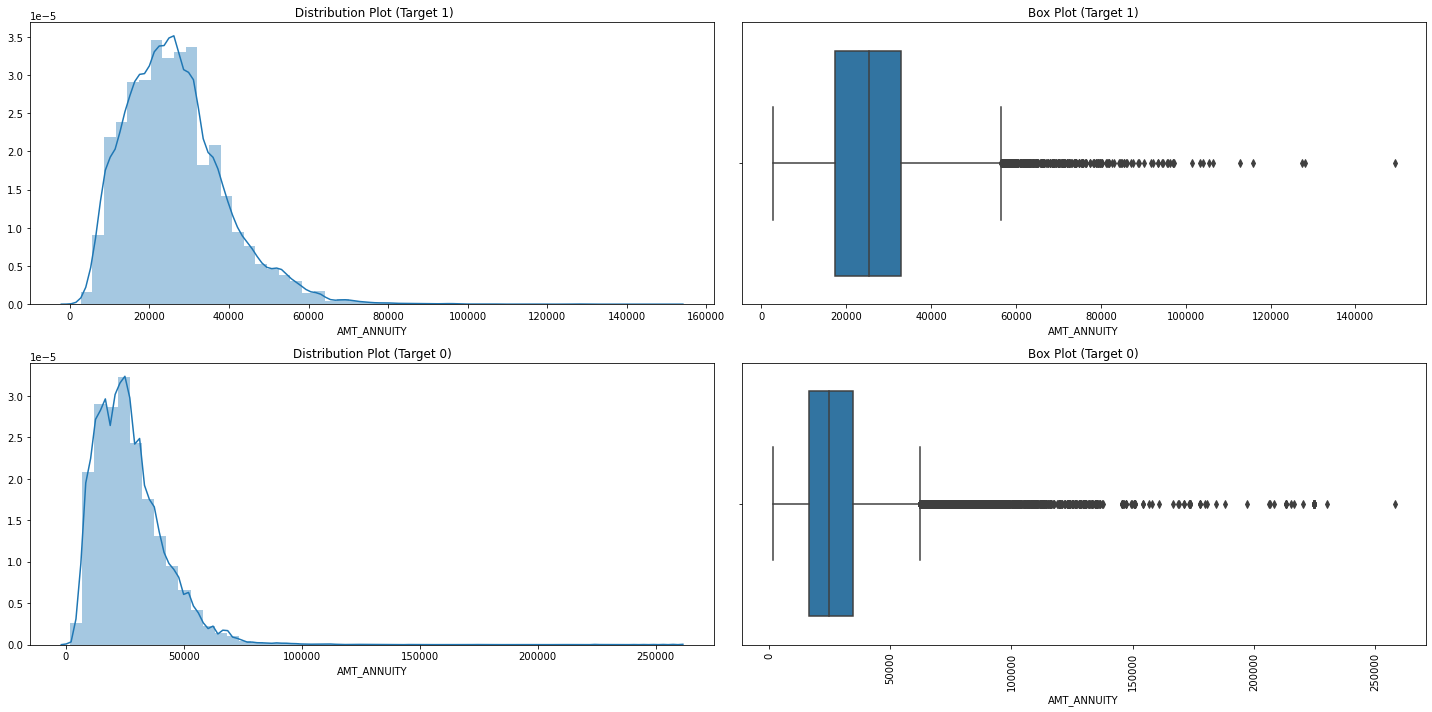

In [47]:
plot_univ(df, df_1,df_0,'AMT_ANNUITY',chartType=0)

### OBSERVATION
**Most of the value lies between 0 - 60000 for Amount Annuity. There are considerable outliers as shown in box plots.**

# 9.  AMT_GOODS_PRICE

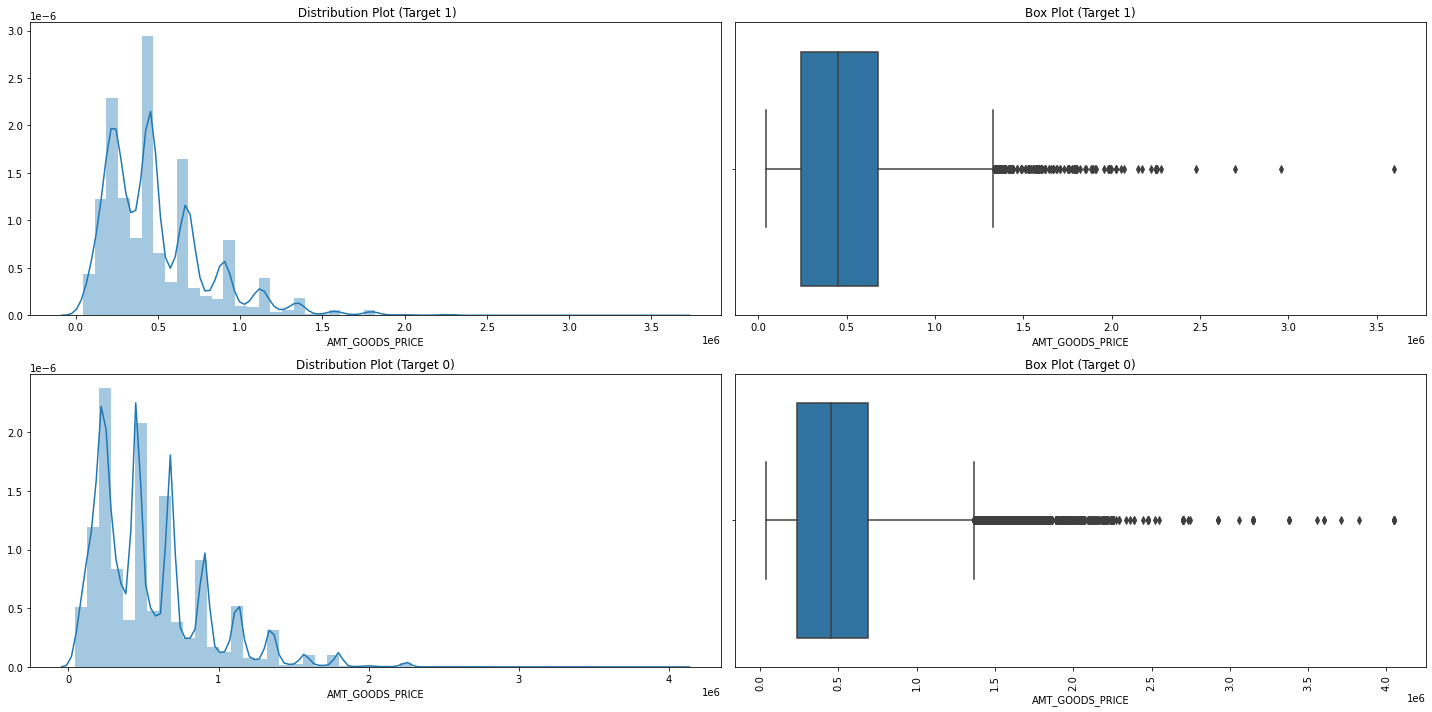

In [48]:
plot_univ(df, df_1,df_0,'AMT_GOODS_PRICE',chartType=0)

### CONCLUSION
**Most of the values lies between 0 - 1.**

# 10. AMT_INCOME_TOTAL

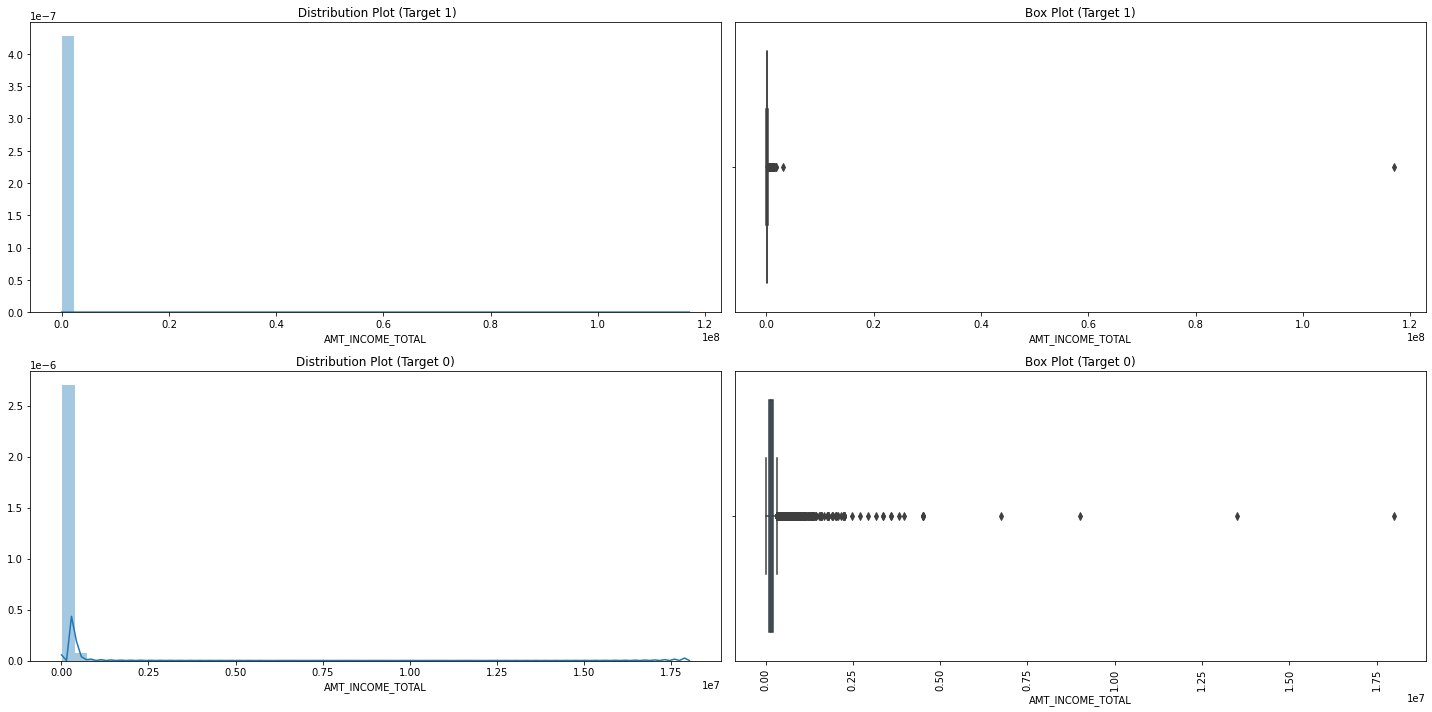

In [49]:
plot_univ(df, df_1,df_0,'AMT_INCOME_TOTAL',chartType=0)

- ### Subtask 4.3: Bivariate Analysis

# 1. NAME_EDUCATION_TYPE

In [50]:
def plot_bivar(df, df_1,df_0, col,col1,hue, type):
       
    if type == 1: # CATEGORICAL - CATEGORICAL analysis
        count_1 = (df_1.groupby([col])['TARGET']
                     .count()
                     .rename('count')
                     .reset_index()) 
        count_0 = (df_0.groupby([col])['TARGET']
                     .count()
                     .rename('count')
                     .reset_index())         
        
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
        ax[0].set_title("Defaulters (Target 1)")
        s1 = sns.barplot(x=col, y="count",  data=count_1,ax=ax[0])
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90, fontweight='light', fontsize='x-large')

        ax[1].set_title("Non Defaulters (Target 0)")
        s2 = sns.barplot(x=col, y="count",  data=count_0,ax=ax[1])
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90, fontweight='light', fontsize='x-large')
         
        plt.tight_layout()
        plt.show()  
        
    if type == 2: # CONTINOUS - CATEGORICAL analysis
        plt.figure(figsize=(16,16))
        sns.boxplot(data =df, x=col,y=col1, hue =hue,orient='v')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()  
             

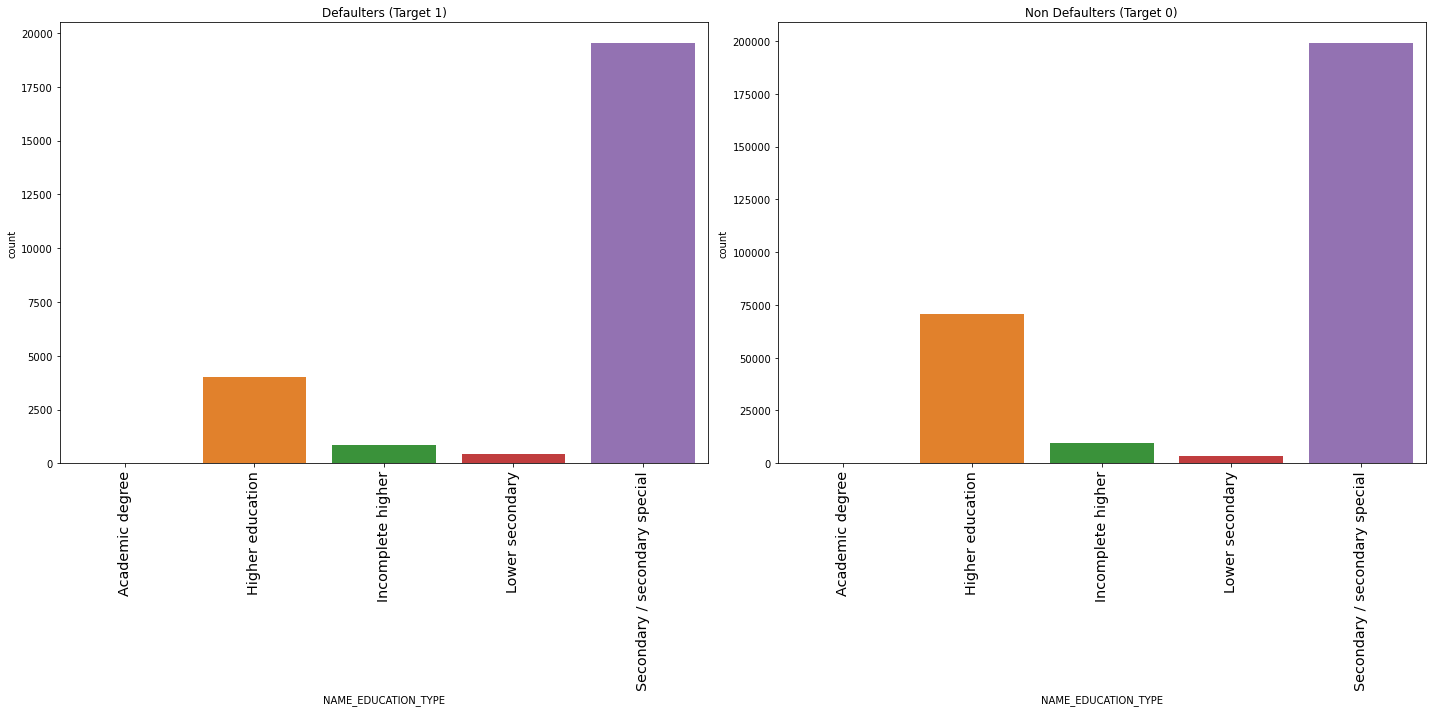

In [51]:
plot_bivar(df, df_1,df_0, 'NAME_EDUCATION_TYPE','','', 1) ## CATEGORICAL - CATEGORICAL analysis

# Observation
**Bank should provide more loans to people with higher education, as they are less likely to default.**

# 2. OCCUPATION_TYPE

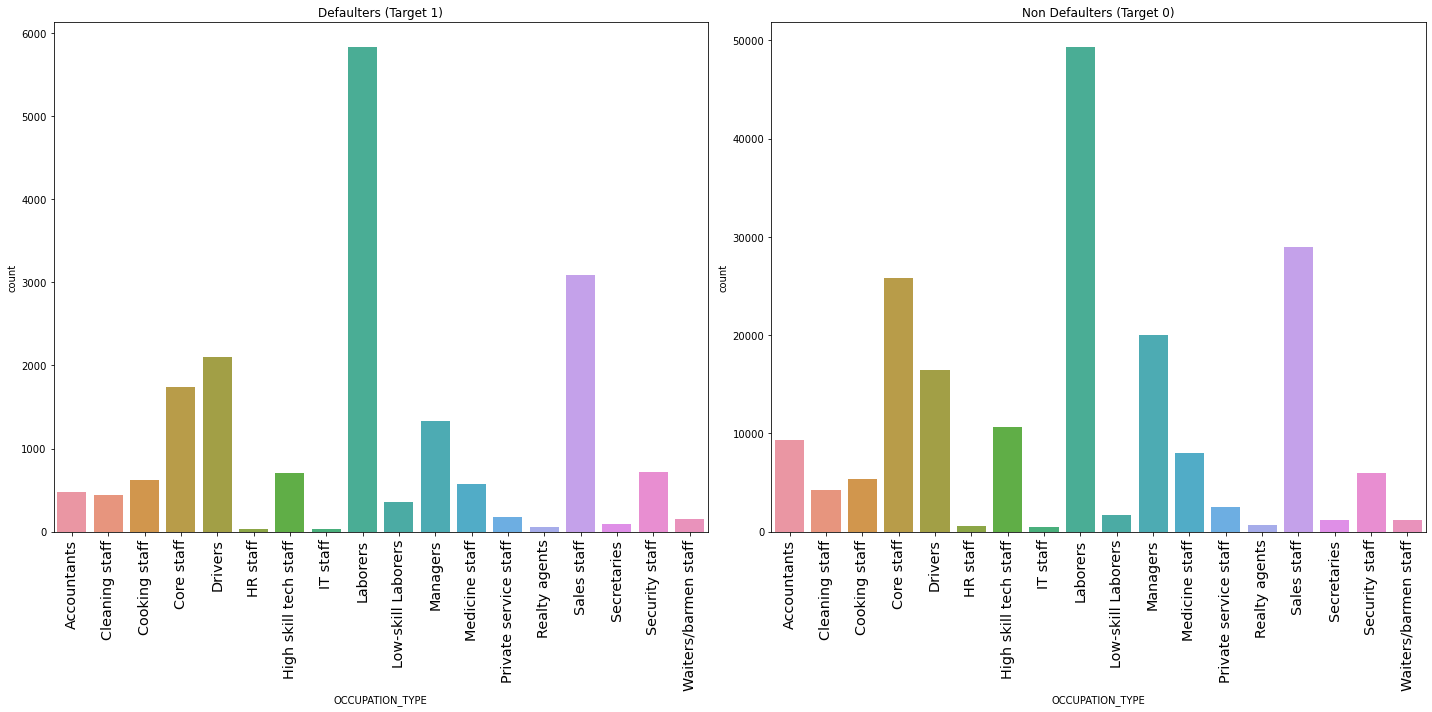

In [52]:
plot_bivar(df, df_1,df_0, 'OCCUPATION_TYPE','','', 1) ## CATEGORICAL - CATEGORICAL analysis

# Observation
**People with low skills such as Laborers and waiters are more likely to default as compared to high skills.**

# 3. NAME_INCOME_TYPE

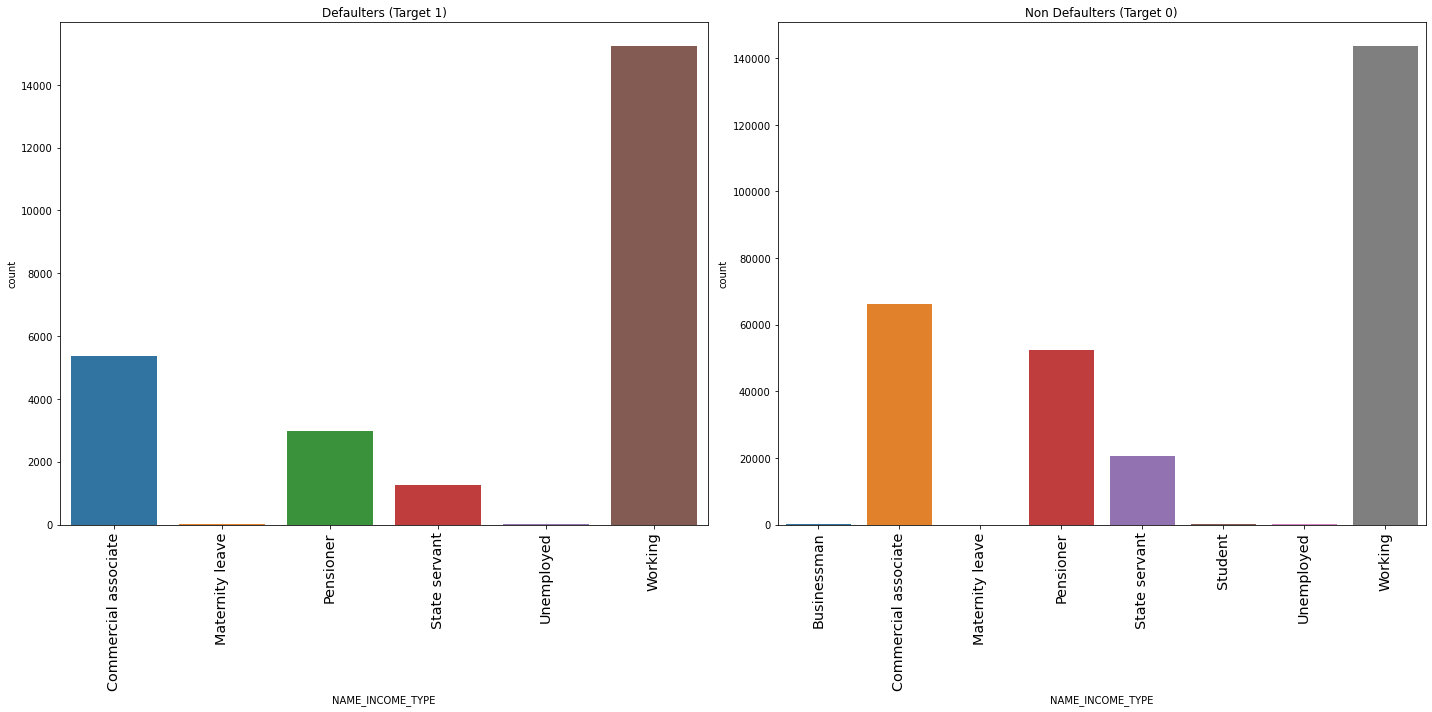

In [53]:
plot_bivar(df, df_1,df_0, 'NAME_INCOME_TYPE','','', 1) ## CATEGORICAL - CATEGORICAL analysis

In [54]:
count_1 = (df_1.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()) 
count_1


NAME_INCOME_TYPE      TARGET
Commercial associate  1          5360
Maternity leave       1             2
Pensioner             1          2982
State servant         1          1249
Unemployed            1             8
Working               1         15224
Name: TARGET, dtype: int64

In [55]:
count_0 = (df_0.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts())  
count_0

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
Maternity leave       0              3
Pensioner             0          52380
State servant         0          20454
Student               0             18
Unemployed            0             14
Working               0         143550
Name: TARGET, dtype: int64

# Observation
**Nothing much can be concluded here. Percentage of values are same on both the datasets**

# 4. NAME_FAMILY_STATUS

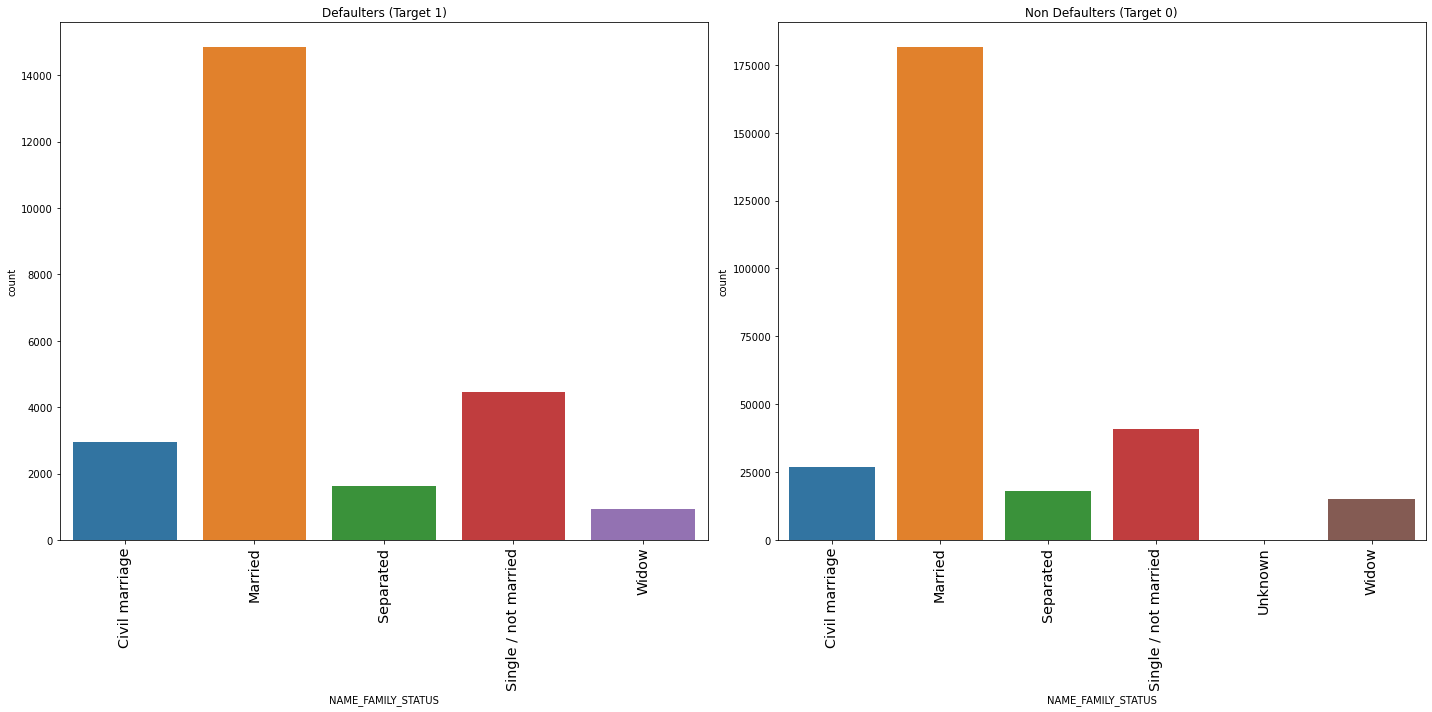

In [56]:
plot_bivar(df, df_1,df_0, 'NAME_FAMILY_STATUS','','', 1) ## CATEGORICAL - CATEGORICAL analysis

# Observation
**People who are single or having civil mariage are more likely to default**

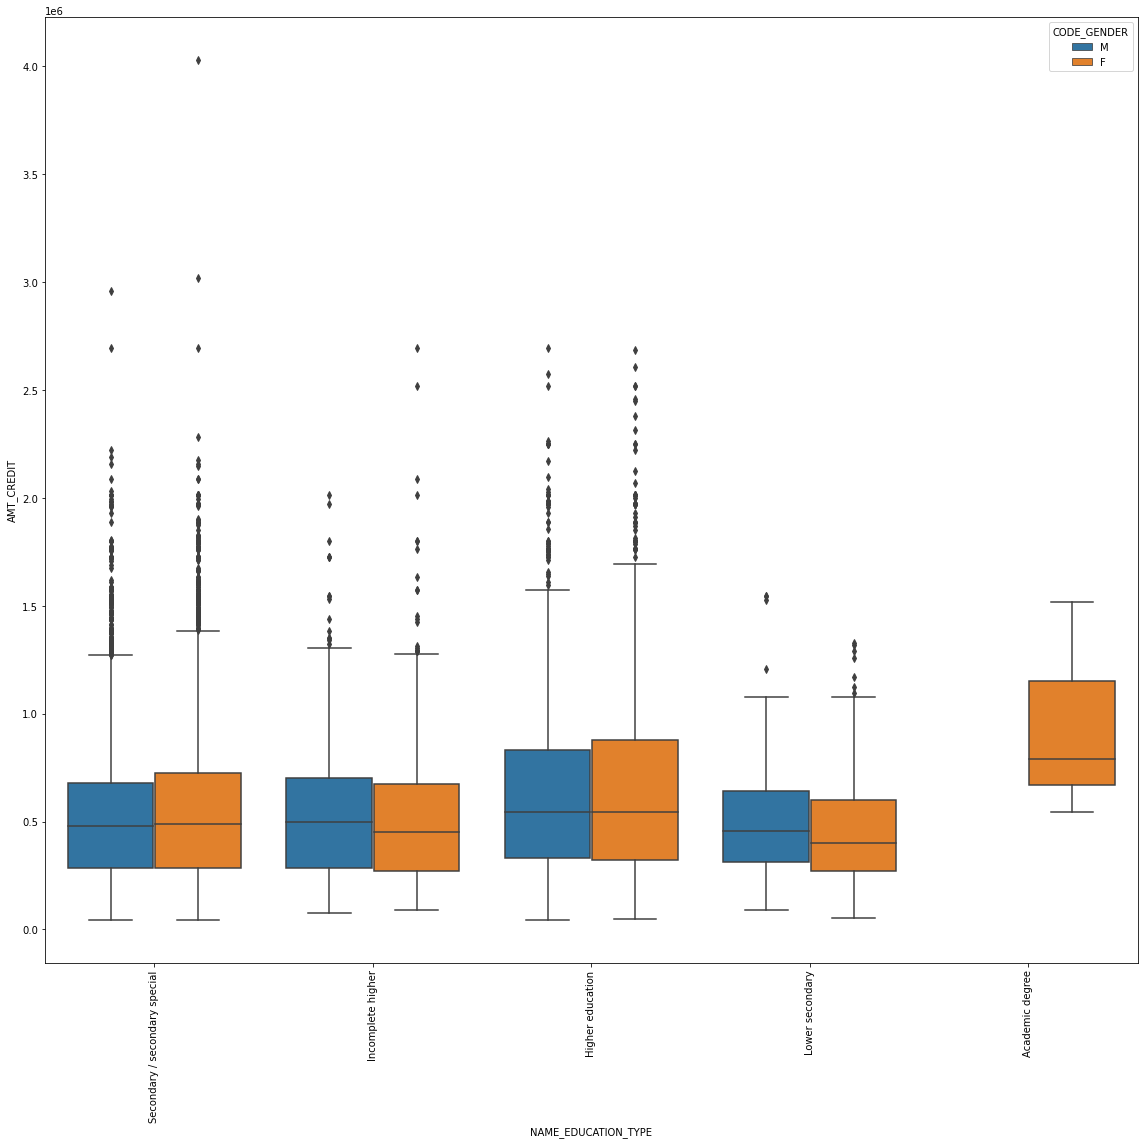

In [57]:
## CONTINOUS - CATEGORICAL analysis for defaulters

plot_bivar(df_1, df_1,df_0, 'NAME_EDUCATION_TYPE','AMT_CREDIT','CODE_GENDER', 2) 

# Conclusion
**Irrespective of gender, median for education level (Secondary and higher education) is approx same. People with higher education tend to take higher credit. Outliers can be seen heavily for education level Secondary and Higher Education**

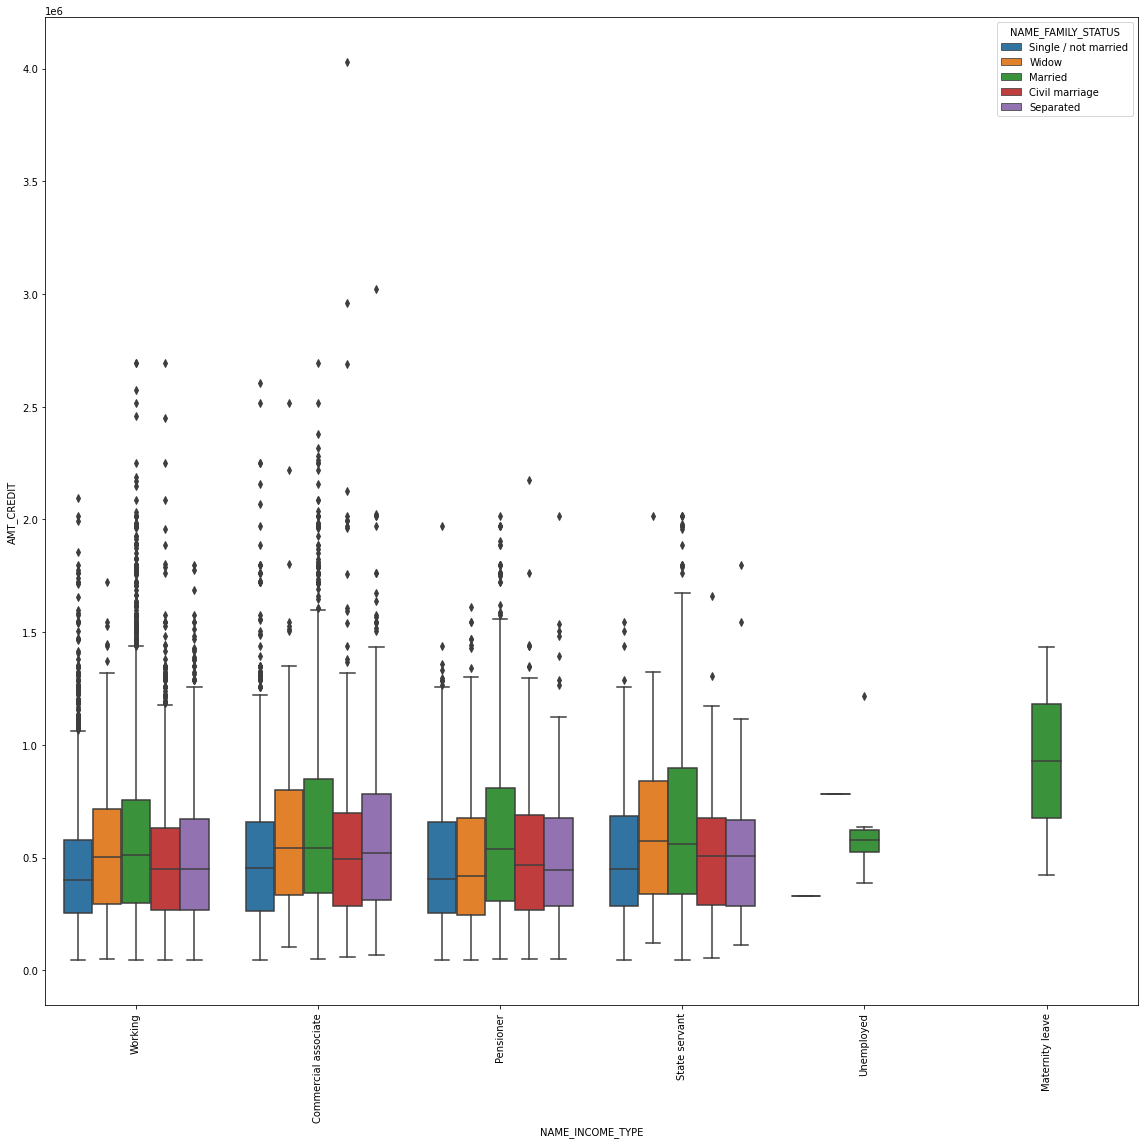

In [58]:
## CONTINOUS - CATEGORICAL analysis for defaulters
plot_bivar(df_1, df_1,df_0,'NAME_INCOME_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS', 2)

# Conclusion
**Outliers are present heavily for Working and Commercial Associate data. People who are married and has Commercial Associate as income type tend to take high credits which results in default.**

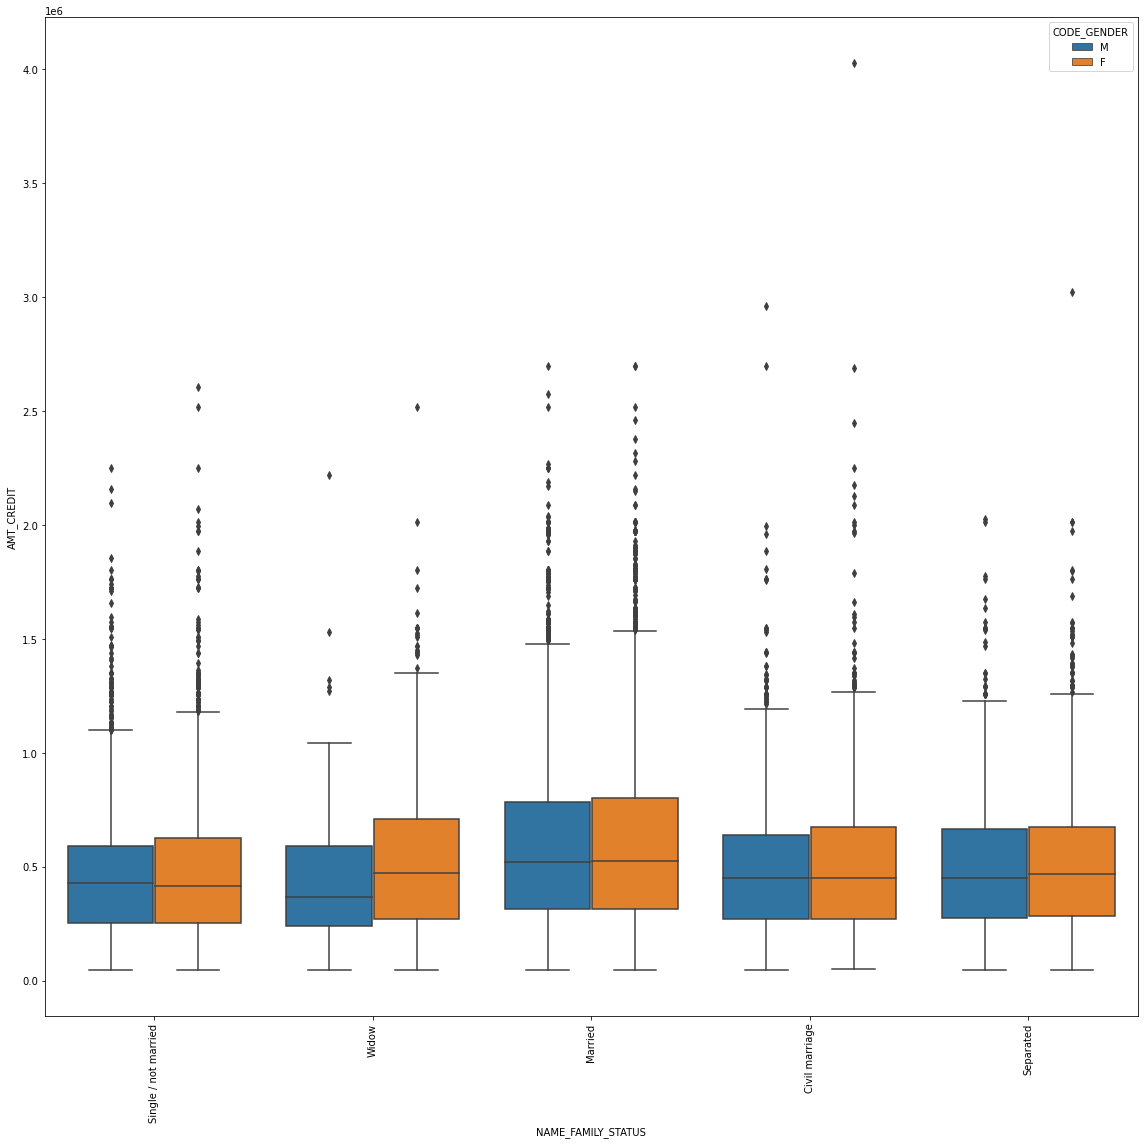

In [59]:
## CONTINOUS - CATEGORICAL analysis for defaulters
plot_bivar(df_1, df_1,df_0, 'NAME_FAMILY_STATUS','AMT_CREDIT','CODE_GENDER', 2)

# Conclusion
**Married people take more credits compared to other family status. Single/ Not married people likely to default less**

In [60]:
## CONTINOUS - CONTINOUS analysis
# Correlation between numerical columns in both datasets
corr_1=df_1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH','AMT_CREDIT','REGION_POPULATION_RELATIVE']]
corr_0=df_0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH','AMT_CREDIT','REGION_POPULATION_RELATIVE']]

corr_1=corr_1.corr()
corr_0=corr_0.corr()

In [61]:
# Correlation Matrix
corr_1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  \
CNT_CHILDREN                      1.0000            0.0048          -0.0081   
AMT_INCOME_TOTAL                  0.0048            1.0000           0.0376   
AMT_GOODS_PRICE                  -0.0081            0.0376           1.0000   
DAYS_BIRTH                       -0.2592           -0.0032           0.1356   
AMT_CREDIT                       -0.0017            0.0381           0.9831   
REGION_POPULATION_RELATIVE       -0.0320            0.0091           0.0760   

                            DAYS_BIRTH  AMT_CREDIT  REGION_POPULATION_RELATIVE  
CNT_CHILDREN                   -0.2592     -0.0017                     -0.0320  
AMT_INCOME_TOTAL               -0.0032      0.0381                      0.0091  
AMT_GOODS_PRICE                 0.1356      0.9831                      0.0760  
DAYS_BIRTH                      1.0000      0.1351                      0.0480  
AMT_CREDIT                      0.1351      1.0000                      0.0692  
REGION_POPULATION_RELATIVE      0.0480      0.0692                      1.0000

In [62]:
# Correlation Matrix
corr_0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  \
CNT_CHILDREN                      1.0000            0.0274          -0.0005   
AMT_INCOME_TOTAL                  0.0274            1.0000           0.3495   
AMT_GOODS_PRICE                  -0.0005            0.3495           1.0000   
DAYS_BIRTH                       -0.3369           -0.0625           0.0446   
AMT_CREDIT                        0.0031            0.3428           0.9873   
REGION_POPULATION_RELATIVE       -0.0244            0.1679           0.1038   

                            DAYS_BIRTH  AMT_CREDIT  REGION_POPULATION_RELATIVE  
CNT_CHILDREN                   -0.3369      0.0031                     -0.0244  
AMT_INCOME_TOTAL               -0.0625      0.3428                      0.1679  
AMT_GOODS_PRICE                 0.0446      0.9873                      0.1038  
DAYS_BIRTH                      1.0000      0.0474                      0.0253  
AMT_CREDIT                      0.0474      1.0000                      0.1006  
REGION_POPULATION_RELATIVE      0.0253      0.1006                      1.0000

In [63]:
# Plotting Heat map
# User function

def plot_heatmap(df,title):
    plt.figure(figsize=(20, 20))
    sns.heatmap(df, center=0.5,linewidths=.1, fmt = '.2f',cmap="coolwarm", annot=True)    
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

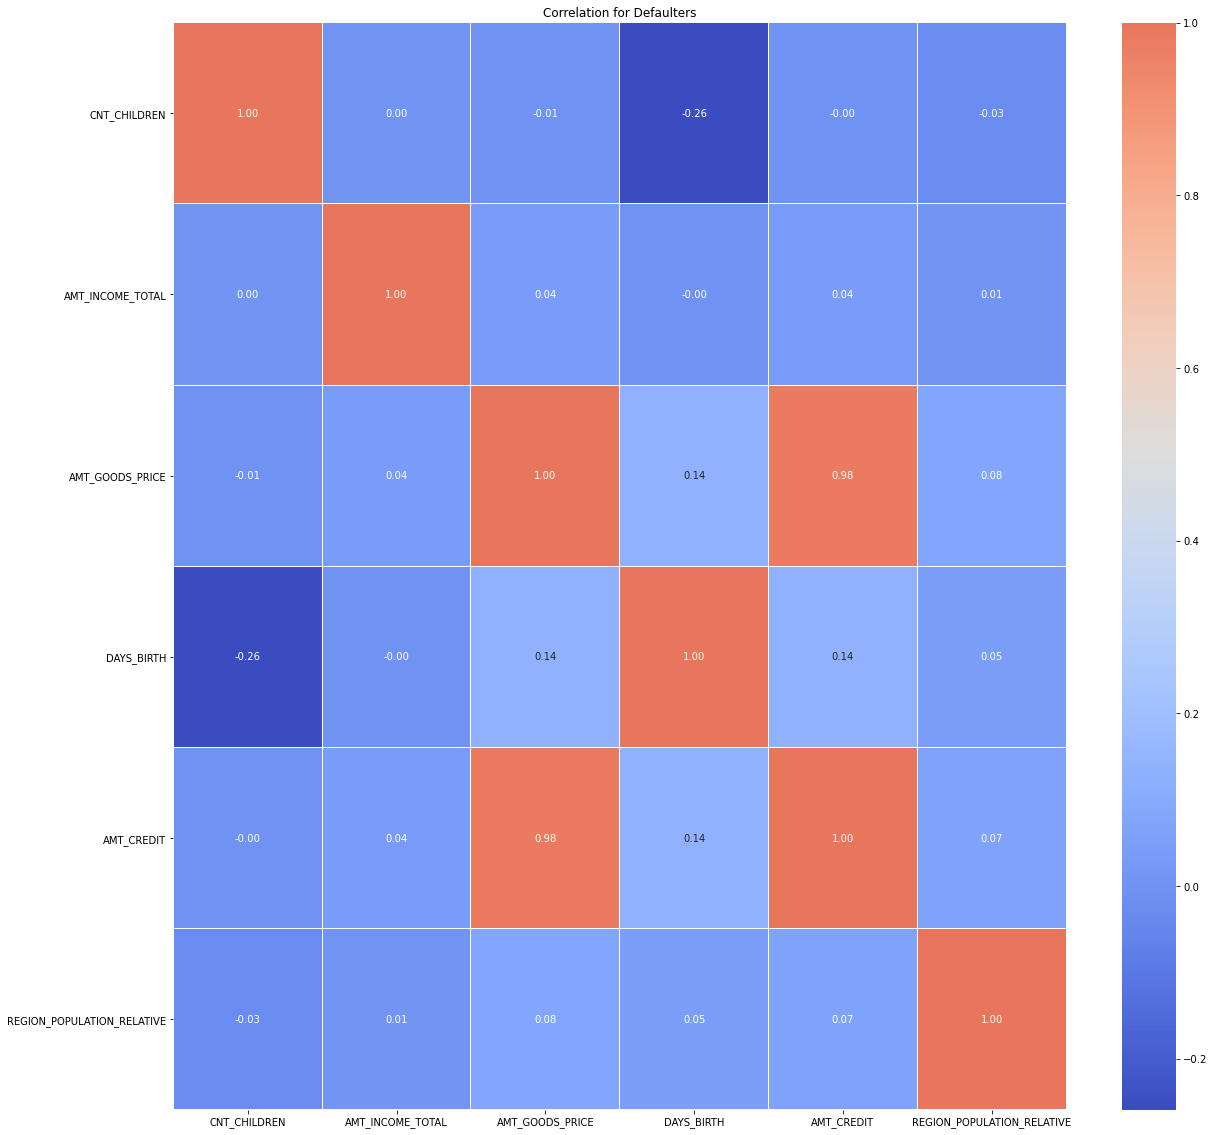

In [64]:
# Heatmap for 'target' 1

plot_heatmap(df=corr_1,title='Correlation for Defaulters')

### Heatmap observation for Target 1
1. AMT_GOODS_PRICE and AMT_CREDIT is positively correlated.
2. Not much correlation between other variables

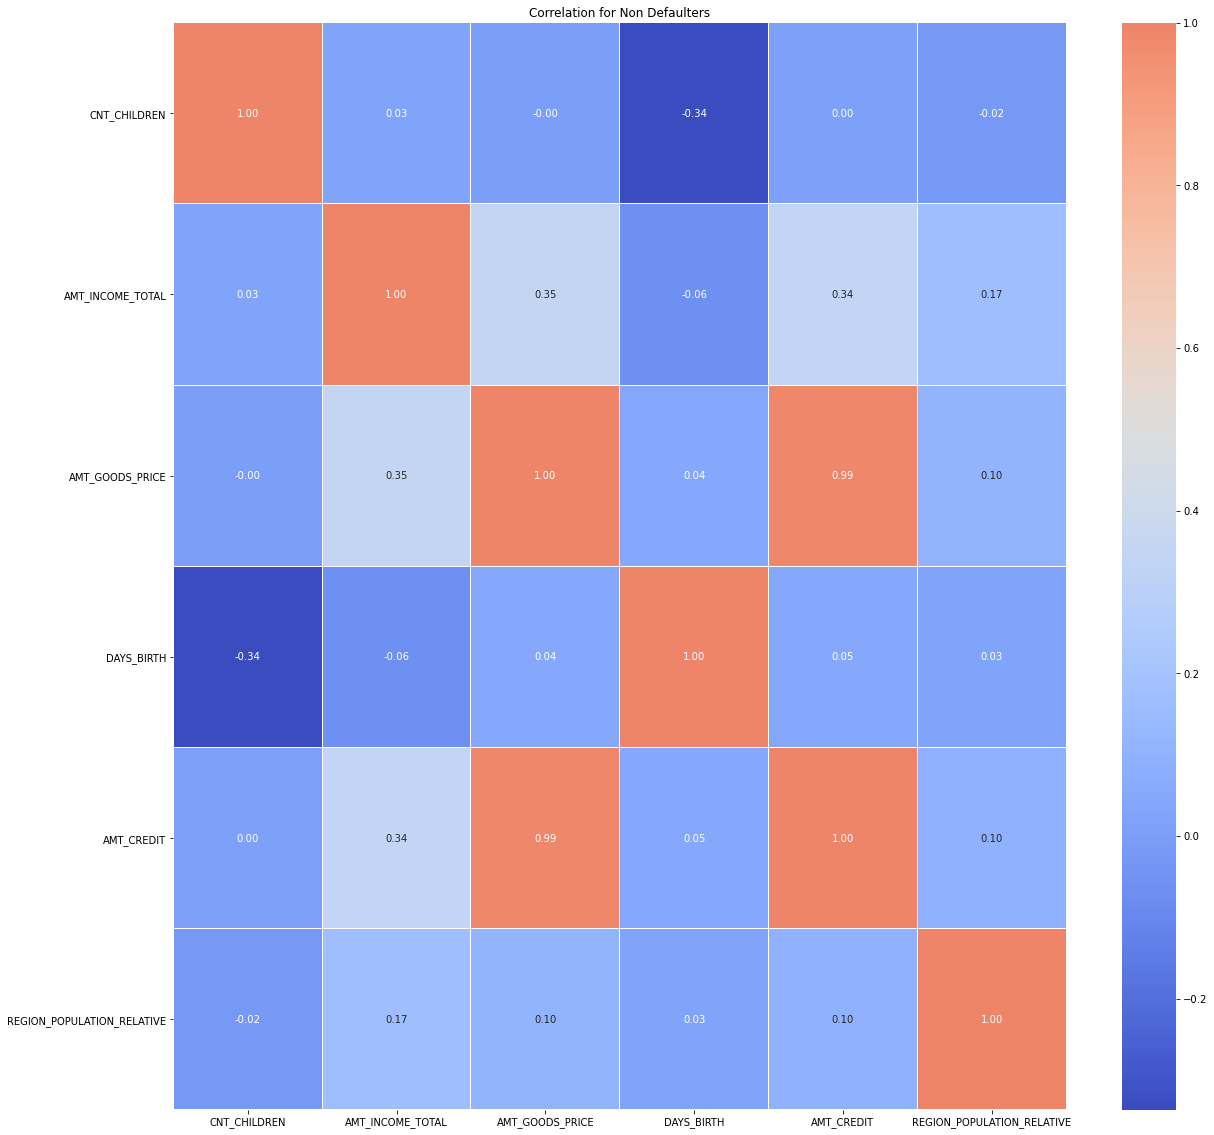

In [65]:
# Heatmap for 'target' 0

plot_heatmap(df=corr_0,title='Correlation for Non Defaulters')

### Heatmap observation for Target 0
1. AMT_GOODS_PRICE AND AMT_CREDIT is positively correlated.
2. Not much correlation between other variables

##  Task 5: Previous Appication Data Analysis

- ### Subtask 5.1: Import and analysis dataset

In [66]:
# Read input dataset. 
# Due to memory issue, we are not loading full dataset. We are doing random smapling and import 50% of dataset
# Importing previous_application csv to dataframe df_prev
import random
# Count the lines
lines = sum(1 for l in open("previous_application.csv"))
# Sample size - in this case ~50%
size = int(lines // 2)
# The row indices to skip - make sure 0 is not included to keep the header!
random.seed(100)
skip_idx = random.sample(range(1, lines), lines - size)

df_prev = pd.read_csv("previous_application.csv", skiprows=skip_idx)

- ### Subtask 5.2: Inspect Dataframe.

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [67]:
# Checking first 5 rows to get idea about dataset
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2819243      176158         Cash loans   47041.3350      450000.0000   
1     1784265      202054         Cash loans   31924.3950      337500.0000   
2     1383531      199383         Cash loans   23703.9300      315000.0000   
3     2315218      175704         Cash loans          nan           0.0000   
4     2367563      342292         Cash loans          nan           0.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0 470790.0000               nan      450000.0000                     MONDAY   
1 404055.0000               nan      337500.0000                   THURSDAY   
2 340573.5000               nan      315000.0000                   SATURDAY   
3      0.0000               nan              nan                    TUESDAY   
4      0.0000               nan              nan                     MONDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        7                           Y   
1                        9                           Y   
2                        8                           Y   
3                       11                           Y   
4                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                nan                    nan   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       nan                    XNA             Approved   
1                       nan                Repairs              Refused   
2                       nan      Everyday expenses             Approved   
3                       nan                    XNA             Canceled   
4                       nan                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0           -512  Cash through the bank                XAP             NaN   
1           -781  Cash through the bank                 HC             NaN   
2           -684  Cash through the bank                XAP          Family   
3            -14                    XNA                XAP             NaN   
4           -386                    XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater                 XNA           Cash            x-sell   
1         Repeater                 XNA           Cash           walk-in   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA            XNA               XNA   
4         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Credit and cash offices                -1                  XNA   
1  Credit and cash offices                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  Cash X-Sell: middle         365243.0000   
1      24.0000             high    Cash Street: high                 nan   
2      18.0000       low_normal     Cash X-Sell: low         365243.0000   
3          nan              XNA                 Cash                 nan   
4          nan              XNA                 Cash                 nan   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VER

In [68]:
# Checking Shape of dataframe
df_prev.shape

(835106, 37)

In [69]:
# Checking column information
df_prev.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648949 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_DOWN_PAYMENT             386962 non-null  float64
 7   AMT_GOODS_PRICE              642199 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 9   HOUR_APPR_PROCESS_START      835106 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       835106 non-null  int64  
 12  RATE_DOWN_PAYMENT            386962 non-null  float64
 13 

In [70]:
# Checking numeric columns statistics
df_prev.describe().T

count         mean         std          min  \
SK_ID_PREV                835106.0000 1922362.4877 532455.8719 1000002.0000   
SK_ID_CURR                835106.0000  278445.9365 102793.2823  100001.0000   
AMT_ANNUITY               648949.0000   15942.9541  14794.5749       0.0000   
AMT_APPLICATION           835106.0000  175236.6887 292897.2301       0.0000   
AMT_CREDIT                835105.0000  196067.7623 318584.8821       0.0000   
AMT_DOWN_PAYMENT          386962.0000    6723.2858  22235.5486      -0.9000   
AMT_GOODS_PRICE           642199.0000  227902.5390 315552.0889       0.0000   
HOUR_APPR_PROCESS_START   835106.0000      12.4866      3.3354       0.0000   
NFLAG_LAST_APPL_IN_DAY    835106.0000       0.9964      0.0596       0.0000   
RATE_DOWN_PAYMENT         386962.0000       0.0796      0.1079      -0.0000   
RATE_INTEREST_PRIMARY       2946.0000       0.1878      0.0884       0.0348   
RATE_INTEREST_PRIVILEGED    2946.0000       0.7717      0.1027       0.4244   
DAYS_DECISION             835106.0000    -880.6861    778.5633   -2922.0000   
SELLERPLACE_AREA          835106.0000     318.1121   7771.3250      -1.0000   
CNT_PAYMENT               648953.0000      16.0474     14.5578       0.0000   
DAYS_FIRST_DRAWING        498284.0000  342063.1610  89179.4822   -2922.0000   
DAYS_FIRST_DUE            498284.0000   13807.8873  72400.9699   -2892.0000   
DAYS_LAST_DUE_1ST_VERSION 498284.0000   33870.4471 106999.0458   -2801.0000   
DAYS_LAST_DUE             498284.0000   76721.7986 149745.1433   -2889.0000   
DAYS_TERMINATION          498284.0000   82084.9802 153363.4238   -2870.0000   
NFLAG_INSURED_ON_APPROVAL 498284.0000       0.3329      0.4713       0.0000   

                                   25%          50%          75%          max  
SK_ID_PREV                1461144.0000 1921813.5000 2382904.7500 2845379.0000  
SK_ID_CURR                 189425.2500  278828.0000  367725.0000  456255.0000  
AMT_ANNUITY                  6315.3000   11250.0000   20631.4200  418058.1450  
AMT_APPLICATION             18625.5000   71046.0000  180175.5000 5850000.0000  
AMT_CREDIT                  24120.0000   80554.5000  216243.0000 4509688.5000  
AMT_DOWN_PAYMENT                0.0000    1620.0000    7695.0000 3060045.0000  
AMT_GOODS_PRICE             50800.5000  112446.0000  234000.0000 5850000.0000  
HOUR_APPR_PROCESS_START        10.0000      12.0000      15.0000      23.0000  
NFLAG_LAST_APPL_IN_DAY          1.0000       1.0000       1.0000       1.0000  
RATE_DOWN_PAYMENT               0.0000       0.0509       0.1089       0.9807  
RATE_INTEREST_PRIMARY           0.1607       0.1891       0.1933       1.0000  
RATE_INTEREST_PRIVILEGED        0.7156       0.8351       0.8525       1.0000  
DAYS_DECISION               -1301.0000    -582.0000    -280.0000      -1.0000  
SELLERPLACE_AREA               -1.0000       3.0000      82.0000 4000000.0000  
CNT_PAYMENT                     6.0000      12.0000      24.0000      84.0000  
DAYS_FIRST_DRAWING         365243.0000  365243.0000  365243.0000  365243.0000  
DAYS_FIRST_DUE              -1626.0000    -831.0000    -412.0000  365243.0000  
DAYS_LAST_DUE_1ST_VERSION   -1241.0000    -361.0000     130.0000  365243.0000  
DAYS_LAST_DUE               -1312.0000    -537.0000     -73.0000  365243.0000  
DAYS_TERMINATION            -1269.0000    -498.0000     -43.0000  365243.0000  
NFLAG_INSURED_ON_APPROVAL       0.0000       0.0000       1.0000       1.0000

In [71]:
# Columns with NaN values
df_prev.columns[df_prev.isna().any()].tolist()

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [72]:
# Check if any duplicate rows are present
sum(df_prev.duplicated())

0

In [73]:
# Check how many columns can be categorical (Categorigal column tend to have lesser unique values)
df_prev.nunique(axis = 0).sort_values()

NFLAG_INSURED_ON_APPROVAL           2
NFLAG_LAST_APPL_IN_DAY              2
FLAG_LAST_APPL_PER_CONTRACT         2
NAME_PRODUCT_TYPE                   3
NAME_CLIENT_TYPE                    4
NAME_CONTRACT_STATUS                4
NAME_PAYMENT_TYPE                   4
NAME_CONTRACT_TYPE                  4
NAME_PORTFOLIO                      5
NAME_YIELD_GROUP                    5
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
CHANNEL_TYPE                        8
CODE_REJECT_REASON                  9
NAME_SELLER_INDUSTRY               11
PRODUCT_COMBINATION                17
RATE_INTEREST_PRIVILEGED           20
HOUR_APPR_PROCESS_START            24
NAME_CASH_LOAN_PURPOSE             25
NAME_GOODS_CATEGORY                26
CNT_PAYMENT                        47
RATE_INTEREST_PRIMARY             101
SELLERPLACE_AREA                 1998
DAYS_FIRST_DRAWING               2705
DAYS_TERMINATION                 2816
DAYS_LAST_DUE                    2858
DAYS_FIRST_D

- ### Subtask 5.3: Missing values analysis

Check percentage of missing values in each columns
If percentage is more than 50% then we can drop the columns as they are not required for analysis

In [74]:
#Get percentage of missing values for each column
df_missing_prev = df_prev.isnull().sum().sort_values()
df_missing_prev = round(df_missing_prev/len(df_prev)*100,2)
df_missing_prev.loc[df_missing_prev > 0]


PRODUCT_COMBINATION          0.0200
CNT_PAYMENT                 22.2900
AMT_ANNUITY                 22.2900
AMT_GOODS_PRICE             23.1000
DAYS_LAST_DUE               40.3300
DAYS_LAST_DUE_1ST_VERSION   40.3300
DAYS_FIRST_DUE              40.3300
DAYS_FIRST_DRAWING          40.3300
NFLAG_INSURED_ON_APPROVAL   40.3300
DAYS_TERMINATION            40.3300
NAME_TYPE_SUITE             49.0800
AMT_DOWN_PAYMENT            53.6600
RATE_DOWN_PAYMENT           53.6600
RATE_INTEREST_PRIMARY       99.6500
RATE_INTEREST_PRIVILEGED    99.6500
dtype: float64

In [75]:
#Get list of columns having missing values greater than 13 % and less than 50%
df_missing_prev = df_prev.isnull().sum().sort_values()
df_missing_prev = round(df_missing_prev/len(df_prev)*100,2)
df_missing_prev.loc[df_missing_prev > 13]

CNT_PAYMENT                 22.2900
AMT_ANNUITY                 22.2900
AMT_GOODS_PRICE             23.1000
DAYS_LAST_DUE               40.3300
DAYS_LAST_DUE_1ST_VERSION   40.3300
DAYS_FIRST_DUE              40.3300
DAYS_FIRST_DRAWING          40.3300
NFLAG_INSURED_ON_APPROVAL   40.3300
DAYS_TERMINATION            40.3300
NAME_TYPE_SUITE             49.0800
AMT_DOWN_PAYMENT            53.6600
RATE_DOWN_PAYMENT           53.6600
RATE_INTEREST_PRIMARY       99.6500
RATE_INTEREST_PRIVILEGED    99.6500
dtype: float64

In [ ]:
#Get list of columns having missing values less than 13 %
df_missing_prev = df_prev.isnull().sum().sort_values()
df_missing_prev = round(df_missing_prev/len(df_prev)*100,2)
df_missing_prev.loc[(df_missing_prev < 13) & (df_missing > 0)]


In [ ]:
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

- ### Subtask 5.4: Merge Application and Previous application dataset

In [ ]:
df_merge=pd.merge(left=df,right=df_prev,how='inner',on='SK_ID_CURR')

In [ ]:
df_merge.head(10)

In [ ]:
# numeric columns summary

df_merge.describe()

# Divide merged dataframe based on Target column

In [ ]:
# Creating two separate dataset based on TARGET column

df_merge_1 = df_merge[df_merge['TARGET'] == 1]
df_merge_1.head(10)

In [ ]:
df_merge_0 = df_merge[df_merge['TARGET'] == 0]
df_merge_0.head(10)

- ### Subtask 5.5: Univariate and Bivariate Analysis on Merge dataset
- Univariate Analysis - Categorical Variables

# 1. NAME_CONTRACT_STATUS

In [ ]:
plot_univ(df_merge, df_merge_1, df_merge_0, 'NAME_CONTRACT_STATUS')

# Observation
1. Many people with Refused and Cancelled previous application are currently defaulters. Bank should avoind giving loans to them. 

# 2. NAME_PRODUCT_TYPE

In [ ]:
plot_univ(df_merge, df_merge_1, df_merge_0, 'NAME_PRODUCT_TYPE')

# Observation
1. Product type as x-sell and female client combination is more likely to default compare to male.

# 3. NAME_PORTFOLIO

In [ ]:
plot_univ(df_merge, df_merge_1, df_merge_0, 'NAME_PORTFOLIO')

# Observation
1. People with Cards as portfolio are more likely to default. Irrespective of portfolio, female clients more likely to default.

# 4. CHANNEL_TYPE

In [ ]:
plot_univ(df_merge, df_merge_1, df_merge_0, 'CHANNEL_TYPE')

# 5. NAME_YIELD_GROUP

In [ ]:
plot_univ(df_merge, df_merge_1, df_merge_0, 'NAME_YIELD_GROUP')

# Observation
1. High yield group more likely to default as the frequency is higher with respect to Target

- Univariate Analysis - Continous Variables

 # 6. AMT_CREDIT

In [ ]:
plot_univ(df_merge, df_merge_1,df_merge_0,'AMT_CREDIT_y',chartType=0)

### OBSERVATION

**Outliers are observed based on box plot. Major distribution lies between 0 - 0.5** 

# 7. AMT_ANNUITY

In [ ]:
plot_univ(df_merge, df_merge_1,df_merge_0,'AMT_ANNUITY_y',chartType=0)

### OBSERVATION
**Most of the value lies between 0 - 25000 for Amount Annuity. There are considerable outliers as shown in box plots.**

# 8.  AMT_GOODS_PRICE

In [ ]:
plot_univ(df_merge, df_merge_1,df_merge_0,'AMT_GOODS_PRICE_y',chartType=0)

### CONCLUSION
**Most of the values lies between 0 - 0.4. Outliers are present**

# 9. AMT_APPLICATION

In [ ]:
plot_univ(df_merge, df_merge_1,df_merge_0,'AMT_APPLICATION',chartType=0)

- Bivariate Analysis - CATEGORICAL - CATEGORICAL analysis

# 1. NAME_CASH_LOAN_PURPOSE

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0,'NAME_CASH_LOAN_PURPOSE','','', 1) ## CATEGORICAL - CATEGORICAL analysis
#['NAME_YIELD_GROUP','NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS','NAME_SELLER_INDUSTRY','NAME_CASH_LOAN_PURPOSE']

# Observation
**People with loan purpose as Repairs have defaulted more than others. **

# 2. NAME_CONTRACT_STATUS

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0, 'NAME_CONTRACT_STATUS','','', 1) ## CATEGORICAL - CATEGORICAL analysis

# Observation
**Bank should not provide loan to people whose previous application is Refused, as they tend to default**

# 3. NAME_PAYMENT_TYPE

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0,  'NAME_PAYMENT_TYPE','','', 1) ## CATEGORICAL - CATEGORICAL analysis

# Observation
**Nothing much can be concluded here.**

- Bivariate Analysis - CONTINOUS - CATEGORICAL analysis

In [ ]:
plot_bivar(df_merge_1, df_merge_1,df_merge_0, 'NAME_CASH_LOAN_PURPOSE','AMT_CREDIT_y','CODE_GENDER', 2)
## CONTINOUS - CATEGORICAL analysis

# Observation
As we can see from above boxplot, people take more loan for buying house or land, as compared to other reason. They also tend to default more

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0, 'NAME_INCOME_TYPE','AMT_CREDIT_y','CODE_GENDER', 2)
## CONTINOUS - CATEGORICAL analysis

# Observation
Student less likely to default. Commercial Associate more liely to default. 3rd quartile is higher for all types of income.

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0, 'NAME_CONTRACT_STATUS','AMT_CREDIT_y','CODE_GENDER', 2) 
## CONTINOUS - CATEGORICAL analysis

# Observation
People with their previous application cancelled or refused are more likely to default

In [ ]:
## CONTINOUS - CATEGORICAL analysis
plot_bivar(df_merge, df_merge_1,df_merge_0, 'NAME_PAYMENT_TYPE','AMT_CREDIT_y','CODE_GENDER', 2)

In [ ]:
plot_bivar(df_merge, df_merge_1,df_merge_0, 'NAME_HOUSING_TYPE','AMT_CREDIT_y','CODE_GENDER', 2)
## CONTINOUS - CATEGORICAL analysis

# Observation
People living with parents tend to default less.

In [ ]:
## CONTINOUS - CONTINOUS analysis
# Correlation between numerical columns in both datasets
corr_merge_1=df_merge_1[['AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','CNT_PAYMENT']]
corr_merge_0=df_merge_0[['AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','CNT_PAYMENT']]

corr_merge_1=corr_merge_1.corr()
corr_merge_0=corr_merge_0.corr()

In [ ]:
# Correlation Matrix
corr_merge_1

In [ ]:
# Correlation Matrix
corr_merge_0

In [ ]:
# Heatmap for 'target' 1

plot_heatmap(df=corr_merge_1,title='Correlation for Defaulters')

### Heatmap observation for Target 1
1. AMT_GOODS_PRICE and AMT_CREDIT is positively correlated.
2. AMT_CREDIT and AMT_APPLICATION is positively correlated.

In [ ]:
# Heatmap for 'target' 0

plot_heatmap(df=corr_merge_0,title='Correlation for Non Defaulters')

### Heatmap observation for Target 0
1. AMT_GOODS_PRICE and AMT_CREDIT is positively correlated.
2. AMT_CREDIT and AMT_APPLICATION is positively correlated.


# Summary

1. Bank should give loans to people with housing type 'With parents', as they are less likely to default. Bank should put more efforst to aquire these people.

2. Bank should reject or give less credit amount if person is in 'Maternity Leave', as they are more likely to default.

3. Bank should focus more on 'Students', 'Pensioner' as compared to 'married' because they are more like to repay loan. 

2. Bank should avoid or reduce loan amount if for a particular person previous application is refused or cancelled. 

4. Loan purpose as 'Repairs' are more likely to default.

5. People with low skills such as Laborers and waiters are more likely to default as compared to high skills.
